In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

C:\Users\ishizuka\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

## データの読み込み

In [3]:
train_x = pd.read_csv("train_x.csv", na_values=["なし"])
train_y = pd.read_csv("train_y.csv" )
test_x = pd.read_csv("test_x.csv", na_values=["なし"])

all_x = pd.concat([train_x, test_x], ignore_index=True, sort=False)
train_y = train_y.drop(columns=["お仕事No."])
all_df = pd.concat([all_x, train_y], axis=1)

# all_df = all_df.drop(columns=["お仕事No."])

C:\Users\ishizuka\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (114) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_x.to_pickle("train_x.pickle")
train_y.to_pickle("train_y.pickle")

In [5]:
all_df.head()

,職場の様子,（紹介予定）入社後の雇用形態,勤務地 最寄駅3（駅名）,勤務地固定,休日休暇(月曜日),応募先 名称,（派遣先）配属先部署 男女比 男,勤務地 最寄駅3（沿線名）,（派遣先）勤務先写真コメント,勤務地 最寄駅3（分）,無期雇用派遣,勤務地 最寄駅2（駅名）,未使用.14,（派遣以外）応募後の流れ,（派遣先）概要 従業員数,電話応対なし,大手企業,（紹介予定）雇用形態備考,週払い,週1日からOK,交通費別途支給,（派遣先）配属先部署 人数,固定残業制 残業代 下限,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,未使用.11,短時間勤務OK(1日4h以内),駅から徒歩5分以内,フリー項目 内容,先輩からのメッセージ,対象者設定 年齢下限,未使用.10,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,動画コメント,Wordのスキルを活かす,未使用.8,経験必須,固定残業制 残業代に充当する労働時間数 下限,給与/交通費 給与支払区分,ブロックコード2,勤務地 最寄駅1（分）,未使用.4,CAD関連のスキルを活かす,未使用.7,お仕事No.,メモ,派遣スタッフ活躍中,ブロックコード3,固定残業制,WEB面接OK,大量募集,公開区分,17時以降出社OK,寮・社宅あり,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,ネットワーク関連のスキルを活かす,Wワーク・副業可能,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),固定残業制 残業代に充当する労働時間数 上限,プログラム関連のスキルを活かす,未使用.15,平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,30代活躍中,フラグオプション選択,未使用.12,エルダー（50〜）活躍中,（派遣）応募後の流れ,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,人材紹介,週2・3日OK,主婦(ママ)・主夫歓迎,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,ブロックコード1,フリー項目 タイトル,社員食堂あり,（紹介予定）入社時期,お仕事名,資格取得支援制度あり,未使用.1,ブランクOK,対象者設定 年齢上限,未使用.20,10時以降出社OK,社会保険制度あり,募集形態,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),勤務地 最寄駅3（駅からの交通手段）,外資系企業,（派遣先）勤務先写真ファイル名,応募先 最寄駅（沿線名）,服装自由,仕事写真（下） 写真1 ファイル名,PowerPointのスキルを活かす,未使用.16,仕事写真（下） 写真3 ファイル名,オープニングスタッフ,応募先 所在地 ブロックコード,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,応募先 所在地 都道府県,動画タイトル,仕事内容,（派遣先）概要 事業内容,応募先 最寄駅（駅名）,残業月10時間未満,休日休暇(土曜日),（紹介予定）年収・給与例,外国人活躍中・留学生歓迎,履歴書不要,未使用.17,休日休暇(木曜日),未使用.9,研修制度あり,日払い,未使用,勤務地 最寄駅1（沿線名）,未使用.18,未使用.22,未使用.5,（派遣先）配属先部署 平均年齢,英語力を活かす,勤務地 周辺情報,仕事写真（下） 写真2 ファイル名,バイク・自転車通勤OK,仕事写真（下） 写真2 コメント,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,未使用.3,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),未使用.2,WEB関連のスキルを活かす,仕事の仕方,未使用.6,給与 経験者給与下限,勤務地 最寄駅1（駅からの交通手段）,応募資格,学生歓迎,紹介予定派遣,固定残業制 残業代 上限,未使用.19,（紹介予定）休日休暇,給与 経験者給与上限,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,未使用.21,待遇・福利厚生,シニア（60〜）歓迎,ベンチャー企業,少人数の職場,仕事写真（下） 写真3 コメント,新卒・第二新卒歓迎,休日休暇(金曜日),お仕事のポイント（仕事PR）,産休育休取得事例あり,扶養控除内,動画ファイル名,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,応募先 備考,オフィスが禁煙・分煙,応募先 所在地 市区町村,仕事写真（下） 写真1 コメント,勤務地 市区町村コード,（派遣先）職場の雰囲気,未使用.13,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,応募拠点,給与/交通費 備考,残業なし,これまでの採用者例,期間･時間 備考,（派遣先）概要 勤務先名（フリガナ）,応募数 合計
0,3,NaN,NaN,1,0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,12.0,NaN,0,22010,1,1,1,NaN,0,1,NaN,NaN,0,NaN,1,0,2019/11/27,「未経験OK」「土日祝休み」「残業ほぼナシ」など、希望の条件にこだわって探せる♪*お仕事件数...,1,NaN,NaN,NaN,3,NaN,3.0,NaN,0,NaN,2203566799,NaN,1,NaN,0,NaN,0,2,NaN,NaN,1,0,1,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,※土・日・祝がお休みです。※企業カレンダーあります。,1,1,NaN,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,9:30〜16:30 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,0,NaN,0,NaN,0,1,0,0,0,東京都足立区,1,206東京,1,0,0,NaN,NaN,1,NaN,ほぼ１６時半終業☆大学＊申請受付ｅｔｃ！未経験スタートＯＫ☆,1,NaN,NaN,99,NaN,0,1,NaN,2020/1/6,0,1,NaN,0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,事務処理を行う部署,4.0,NaN,こだわりの条件でワガママに探せる＊,１月スタート！実働短め☆残業ほとんどなし×基本土日祝お休み！朝は少しゆっくりの９：３０出勤で...,NaN,NaN,0,1,NaN,NaN,1,NaN,0,NaN,1,NaN,NaN,東京メトロ千代田線,NaN,NaN,NaN,45.0,0,NaN,NaN,NaN,NaN,0,30000,13,NaN,0,0,0,NaN,0,NaN,NaN,2,NaN,NaN,1.0,◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬＯＯＫ関数）<BR><BR>▼...,NaN,0,NaN,NaN,NaN,NaN,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,NaN,NaN,NaN,NaN,NaN,NaN,1,0,◆駅からスグ！飲食店・コンビニが近く便利！職場環境ＧＯＯＤ◎！当社含む派遣スタッフ多数活躍中...,1,0,022_190725.mp4,1550,1,1,NaN,1,NaN,NaN,121,当社スタッフ活躍中です！<BR>,NaN,NaN,北千住,NaN,NaN,【月収例】19万5300円＋残業代（21日勤務の場合）,1,NaN,◆開始日はご相談可能です！詳しくはお問い合わせください！,NaN,1.945910
1,3,1.0,NaN,1,0,NaN,2.0,NaN,NaN,NaN,NaN,淡路町,NaN,NaN,NaN,NaN,1,正社員,NaN,0,0,33.0,NaN,0,20020,1,1,1,NaN,0,1,NaN,NaN,0,NaN,0,0,2019/11/27,「未経験OK」「土日祝休み」「残業ほぼナシ」など、希望の条件にこだわって探せる♪*お仕事件数...,1,NaN,NaN,NaN,3,NaN,1.0,NaN,0,NaN,2203546900,NaN,1,NaN,0,NaN,0,2,NaN,NaN,1,0,1,1,NaN,NaN,東京メトロ丸ノ内線,0,NaN,NaN,NaN,0,NaN,1.0,※土・日・祝がお休みです。,1,3,NaN,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,NaN,0,NaN,0,1,0,1,0,東京都千代田区,1,206東京,1,0,0,NaN,NaN,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,1,NaN,NaN,99,NaN,0,1,NaN,2019/11/26,0,1,NaN,0,1018-2.jpg,NaN,1,NaN,0,NaN,NaN,NaN,NaN,経理部,8.0,NaN,こだわりの条件でワガママに探せる＊,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪

## EDA

### 被説明変数

In [6]:
all_df.describe()["応募数 合計"]

count    15853.000000
mean         0.542247
std          0.785475
min          0.000000
25%          0.000000
50%          0.000000
75%          1.098612
max          4.615121
Name: 応募数 合計, dtype: float64

C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24

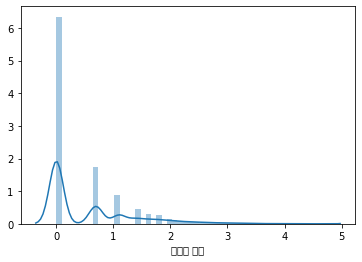

In [7]:
sns.distplot(all_df["応募数 合計"])

### 全て欠損しているカラム

In [8]:
# すべて欠損しているカラム
allnot_col = list(all_df.isnull().sum()[all_df.isnull().sum()==19244].index)
allnot_col

['勤務地\u3000最寄駅3（駅名）',
 '応募先\u3000名称',
 '勤務地\u3000最寄駅3（沿線名）',
 '（派遣先）勤務先写真コメント',
 '勤務地\u3000最寄駅3（分）',
 '無期雇用派遣',
 '未使用.14',
 '（派遣以外）応募後の流れ',
 '（派遣先）概要\u3000従業員数',
 '電話応対なし',
 '週払い',
 '固定残業制 残業代 下限',
 '未使用.11',
 'フリー項目\u3000内容',
 '先輩からのメッセージ',
 '未使用.10',
 '未使用.8',
 '経験必須',
 '固定残業制 残業代に充当する労働時間数 下限',
 'ブロックコード2',
 '未使用.4',
 '未使用.7',
 'メモ',
 'ブロックコード3',
 'WEB面接OK',
 '17時以降出社OK',
 '寮・社宅あり',
 'ネットワーク関連のスキルを活かす',
 'Wワーク・副業可能',
 '固定残業制 残業代に充当する労働時間数 上限',
 'プログラム関連のスキルを活かす',
 '未使用.15',
 '未使用.12',
 'エルダー（50〜）活躍中',
 '人材紹介',
 '主婦(ママ)・主夫歓迎',
 'ブロックコード1',
 'フリー項目\u3000タイトル',
 '未使用.1',
 'ブランクOK',
 '未使用.20',
 '募集形態',
 '勤務地\u3000最寄駅3（駅からの交通手段）',
 '応募先\u3000最寄駅（沿線名）',
 '仕事写真（下）\u3000写真1\u3000ファイル名',
 '未使用.16',
 '仕事写真（下）\u3000写真3\u3000ファイル名',
 'オープニングスタッフ',
 '応募先\u3000所在地\u3000ブロックコード',
 '応募先\u3000所在地\u3000都道府県',
 '応募先\u3000最寄駅（駅名）',
 '外国人活躍中・留学生歓迎',
 '未使用.17',
 '未使用.9',
 '日払い',
 '未使用',
 '未使用.18',
 '未使用.22',
 '未使用.5',
 '勤務地\u3000周辺情報',
 '仕事写真（下）\u3000写真2\u3000ファイル名',
 'バイク・自転車通勤OK',
 '仕事写真（下）\u3000写真2\u3

In [9]:
# すべて欠損しているカラムは削除
all_df = all_df.drop(columns=allnot_col)
all_df.shape

(19244, 128)

### 値がすべて同じカラム

In [10]:
#それぞれの特徴量データが何種類に分かれるか
pd.DataFrame(all_df.nunique())

,0
職場の様子,3
（紹介予定）入社後の雇用形態,3
勤務地固定,1
休日休暇(月曜日),2
（派遣先）配属先部署 男女比 男,11
勤務地 最寄駅2（駅名）,856
大手企業,2
（紹介予定）雇用形態備考,7
週1日からOK,1
交通費別途支給,2


In [11]:
# 値がすべて同じカラム
one_col = list(all_df.nunique()[all_df.nunique()==1].index)
one_col

['勤務地固定',
 '週1日からOK',
 'ミドル（40〜）活躍中',
 'ルーティンワークがメイン',
 '対象者設定\u3000年齢下限',
 '動画コメント',
 '給与/交通費\u3000給与支払区分',
 'CAD関連のスキルを活かす',
 '固定残業制',
 '公開区分',
 '20代活躍中',
 '検索対象エリア',
 '就業形態区分',
 '30代活躍中',
 '（派遣）応募後の流れ',
 '雇用形態',
 'Dip JobsリスティングS',
 '資格取得支援制度あり',
 '対象者設定\u3000年齢上限',
 '社会保険制度あり',
 '動画タイトル',
 '（派遣先）概要\u3000事業内容',
 '残業月10時間未満',
 '履歴書不要',
 '研修制度あり',
 'DTP関連のスキルを活かす',
 '新卒・第二新卒歓迎',
 '産休育休取得事例あり',
 '動画ファイル名',
 '対象者設定\u3000性別',
 'WEB登録OK']

In [12]:
# 値がすべて同じカラムかつ欠損値を持たないカラムは削除
onefull_col = list(all_df[one_col].isnull().sum()[all_df[one_col].isnull().sum()==0].index)
all_df = all_df.drop(columns=onefull_col)

In [13]:
# 値がすべて同じカラムかつ欠損値を持つカラム
one_col2 = all_df.nunique()[all_df.nunique()==1].index
one_col2

Index(['（派遣先）概要　事業内容'], dtype='object')

### 重複データ
https://note.nkmk.me/python-pandas-duplicated-drop-duplicates/

In [14]:
# データを分割
# ちなみにtestデータで重複している行はない
train = all_df[all_df["応募数 合計"].notnull()]
test = all_df[all_df["応募数 合計"].isnull()]
train.shape

(15853, 98)

In [15]:
train[train.duplicated(subset=["お仕事No."], keep="last")]

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,仕事内容,（派遣先）概要 事業内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,期間･時間 備考,応募数 合計
1,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.951244
2,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.295837
3,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！,3.970292
4,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！,3.784190
8,3,2.0,0,6.0,NaN,0,契約社員,0,17.0,0,20020,0,0,1,1,0,2019/11/27,1,1.0,2203526826,1,0,0,NaN,0,0,NaN,

In [16]:
# "お仕事No."が同じでちがう項目は開始日や終了日がほとんど
train[train.duplicated(subset=["お仕事No.", "掲載期間　開始日"], keep="last")]

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,仕事内容,（派遣先）概要 事業内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,期間･時間 備考,応募数 合計
1,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.951244
3,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！,3.970292
8,3,2.0,0,6.0,NaN,0,契約社員,0,17.0,0,20020,0,0,1,1,0,2019/11/27,1,1.0,2203526826,1,0,0,NaN,0,0,NaN,NaN,※土・日・祝がお休みです。,3,8:30〜17:15 <BR>※休憩は６０分です。９時〜１７時４５分の勤務も選べます。,5,1,0,0,1,0,0,0,東京都墨田区,1,206東京,1,0,◆6ヶ月後,未経験も6ヶ月後社員[賞与あり]自然にやさしい非営利団体◎事務,0,2019/11/26,0,1,0,NaN,1,1,技術部,4.0,錦糸町駅からすぐ！幅広い年齢層の方＆派遣スタッフが活躍中！残業がほとんどない魅力的なお仕事で...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★契約社員登用後：年収３０６〜３１０万円（賞与含）★※実際の年収等は別途ご確認ください。,0,総武本線,43.0,0,30000,13,0,0,0,NaN,0,3,1.0,【高卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｗｏｒｄ（図・フォーム活用）・Ｅｘ...,1,年間休日１２５日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆同業務就業の方が在籍で安心！オシャレを楽しめるオフィカジＯＫ♪禁煙なのでタバコを吸わない方...,0,1600,1,107,同業務就業の方が在籍で安心です！<BR>,完備,錦糸町,NaN,【月収例】26万400円＋残業代（21日勤務の場合）,1,NaN,3.218876
10,3,1.0,0,3.0,御茶ノ水,1,正社員,0,17.0,0,22030,1,0,1,0,0,2019/11/27,1,1.0,2203501746,1,0,1,中央本線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,【未経験も3ヶ月後正社員へ◎賞与2回】コツコツと*伝票の登録etc,0,2019/11/26,0,1,0,NaN,1,0,本社／総務部,7.0,大手損害保険会社でのオシゴトです！残業ほぼなしでワークライフバランスもバッチリですよ♪<BR...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収約３５０万円（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,40.0,0,28000,13,0,0,0,NaN,0,1,1.0,【短大卒以上】◆事務の経験がある方歓迎します。<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪駅直結！複数路線利用可能！自社ビル内に売店・コンビニ・社員食堂有！休憩...,0,1800,1,101,自社ビル内に売店・コンビニ・社員食堂あります！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.218876
12,3,1.0,0,5.0,九段下,0,正社員,0,6.0,1,22020,0,0,1,0,0,2019/11/27,1,6.0,2203519812,0,0,0,東京メトロ半蔵門線,0,0,NaN,1.0

In [17]:
# "応募数 合計"以外すべて一致している行をひとつずつ表示
train.drop(columns=["応募数 合計"])[train.drop(columns=["応募数 合計"]).duplicated(keep="last")]

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,仕事内容,（派遣先）概要 事業内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,期間･時間 備考
1,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN
3,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！
8,3,2.0,0,6.0,NaN,0,契約社員,0,17.0,0,20020,0,0,1,1,0,2019/11/27,1,1.0,2203526826,1,0,0,NaN,0,0,NaN,NaN,※土・日・祝がお休みです。,3,8:30〜17:15 <BR>※休憩は６０分です。９時〜１７時４５分の勤務も選べます。,5,1,0,0,1,0,0,0,東京都墨田区,1,206東京,1,0,◆6ヶ月後,未経験も6ヶ月後社員[賞与あり]自然にやさしい非営利団体◎事務,0,2019/11/26,0,1,0,NaN,1,1,技術部,4.0,錦糸町駅からすぐ！幅広い年齢層の方＆派遣スタッフが活躍中！残業がほとんどない魅力的なお仕事で...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★契約社員登用後：年収３０６〜３１０万円（賞与含）★※実際の年収等は別途ご確認ください。,0,総武本線,43.0,0,30000,13,0,0,0,NaN,0,3,1.0,【高卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｗｏｒｄ（図・フォーム活用）・Ｅｘ...,1,年間休日１２５日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆同業務就業の方が在籍で安心！オシャレを楽しめるオフィカジＯＫ♪禁煙なのでタバコを吸わない方...,0,1600,1,107,同業務就業の方が在籍で安心です！<BR>,完備,錦糸町,NaN,【月収例】26万400円＋残業代（21日勤務の場合）,1,NaN
10,3,1.0,0,3.0,御茶ノ水,1,正社員,0,17.0,0,22030,1,0,1,0,0,2019/11/27,1,1.0,2203501746,1,0,1,中央本線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,【未経験も3ヶ月後正社員へ◎賞与2回】コツコツと*伝票の登録etc,0,2019/11/26,0,1,0,NaN,1,0,本社／総務部,7.0,大手損害保険会社でのオシゴトです！残業ほぼなしでワークライフバランスもバッチリですよ♪<BR...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収約３５０万円（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,40.0,0,28000,13,0,0,0,NaN,0,1,1.0,【短大卒以上】◆事務の経験がある方歓迎します。<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪駅直結！複数路線利用可能！自社ビル内に売店・コンビニ・社員食堂有！休憩...,0,1800,1,101,自社ビル内に売店・コンビニ・社員食堂あります！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN
12,3,1.0,0,5.0,九段下,0,正社員,0,6.0,1,22020,0,0,1,0,0,2019/11/27,1,6.0,2203519812,0,0,0,東京メトロ半蔵門線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜18:00 <BR>※休憩は６０分です。,

In [18]:
# グループ化して応募数 合計の平均をとったカラムを追加
train['応募数mean'] = train.groupby(["お仕事No."])["応募数 合計"].transform("mean")
test["応募数mean"] = np.nan
# 全重複数もカラムとして残しておく
all_df = pd.concat([train, test], ignore_index=True, sort=False)
all_df["all_count"] = all_df.groupby(["お仕事No."])["お仕事No."].transform("count")
train = all_df[all_df["応募数mean"].notnull()]
test = all_df[all_df["応募数mean"].isnull()]

train.head()

C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,仕事内容,（派遣先）概要 事業内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,期間･時間 備考,応募数 合計,応募数mean,all_count
0,3,NaN,0,6.0,NaN,0,NaN,0,12.0,0,22010,1,0,1,1,0,2019/11/27,1,3.0,2203566799,1,0,0,NaN,0,0,NaN,NaN,※土・日・祝がお休みです。※企業カレンダーあります。,1,9:30〜16:30 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,0,0,0,1,0,0,0,東京都足立区,1,206東京,1,1,NaN,ほぼ１６時半終業☆大学＊申請受付ｅｔｃ！未経験スタートＯＫ☆,0,2020/1/6,0,1,0,NaN,1,0,事務処理を行う部署,4.0,１月スタート！実働短め☆残業ほとんどなし×基本土日祝お休み！朝は少しゆっくりの９：３０出勤で...,NaN,1,NaN,0,東京メトロ千代田線,45.0,0,30000,13,0,0,0,NaN,0,2,1.0,◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬＯＯＫ関数）<BR><BR>▼...,0,NaN,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆駅からスグ！飲食店・コンビニが近く便利！職場環境ＧＯＯＤ◎！当社含む派遣スタッフ多数活躍中...,0,1550,1,121,当社スタッフ活躍中です！<BR>,NaN,北千住,NaN,【月収例】19万5300円＋残業代（21日勤務の場合）,1,◆開始日はご相談可能です！詳しくはお問い合わせください！,1.945910,1.945910,1
1,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.951244,3.623540,5
2,3,1.0,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,2019/11/27,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,2019/11/26,0,1,0,1018-2.jpg,1,0,経理部,8.0,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,NaN,3.295837,3.623540,5
3,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NaN,1.0,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,2019/11/26,0,1,0,NaN,1,0,企画調整部,2.0,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,NaN,0,1,1.0,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,◆開始日はご相談可能です！詳しくはお問い合わせください！,3.970292,3.877241,5
4,2,1.0,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,2019/11/27,1,6.0,2203

In [19]:
train = train.drop(columns=["応募数 合計"])
test = test.drop(columns=["応募数 合計"])

train = train.drop_duplicates(subset=["お仕事No."])
train.shape

(9671, 99)

In [20]:
all_df = pd.concat([train, test], ignore_index=True, sort=False)
all_df.shape

(13062, 99)

## 特徴量エンジニアリング

### 欠損値の総数

In [21]:
# 欠損している数を表すカラムを追加
all_df["NaN_num"] = all_df.isnull().sum(axis=1)

### 列ごとに欠損かどうかを表す2値変数

In [22]:
no_df = pd.DataFrame({"num": all_df.isnull().sum()[all_df.isnull().sum()>0].values,
                      "type": all_df[all_df.isnull().sum()[all_df.isnull().sum()>0].index].dtypes},
                      index=all_df.isnull().sum()[all_df.isnull().sum()>0].index)

no_df

,num,type
（紹介予定）入社後の雇用形態,11335,float64
（派遣先）配属先部署 男女比 男,1685,float64
勤務地 最寄駅2（駅名）,6255,object
（紹介予定）雇用形態備考,11335,object
（派遣先）配属先部署 人数,1670,float64
勤務地 最寄駅1（分）,622,float64
勤務地 最寄駅2（沿線名）,6255,object
（派遣先）概要 勤務先名（漢字）,12436,object
勤務地 最寄駅2（駅からの交通手段）,6332,float64
（紹介予定）入社時期,11335,object


In [23]:
all_df.loc[:,no_df.index].nunique()

（紹介予定）入社後の雇用形態           3
（派遣先）配属先部署　男女比　男        11
勤務地　最寄駅2（駅名）           856
（紹介予定）雇用形態備考             7
（派遣先）配属先部署　人数          115
勤務地　最寄駅1（分）             30
勤務地　最寄駅2（沿線名）          221
（派遣先）概要　勤務先名（漢字）        86
勤務地　最寄駅2（駅からの交通手段）       3
（紹介予定）入社時期               7
（派遣先）勤務先写真ファイル名         45
（派遣先）配属先部署　男女比　女        11
（派遣先）概要　事業内容             1
（紹介予定）年収・給与例          1237
勤務地　最寄駅1（沿線名）          351
（派遣先）配属先部署　平均年齢         50
給与/交通費　給与上限            125
勤務地　最寄駅1（駅からの交通手段）       3
（紹介予定）休日休暇              48
（派遣先）職場の雰囲気            936
（紹介予定）待遇・福利厚生          115
勤務地　最寄駅1（駅名）          1747
勤務地　最寄駅2（分）             32
給与/交通費　備考              573
期間･時間　備考                 7
応募数mean                221
dtype: int64

In [24]:
# all_df["NaN_16180"] = np.where(all_df["（紹介予定）入社後の雇用形態"].isnull(), 1, 0)

# 欠損かどうかを表すカラムを追加
for i in no_df.index:
    all_df["NaN_"+i] = np.where(all_df[i].isnull(), 1, 0)

all_df = all_df.drop(columns=["（派遣先）概要　事業内容","NaN_応募数mean"])

### 男女比　女は削除

In [25]:
all_df = all_df.drop(columns=["（派遣先）配属先部署　男女比　女", "NaN_（派遣先）配属先部署　男女比　女"])
all_df.shape

(13062, 122)

## 欠損値
GDBTライブラリを使う場合は欠損値の補完はしない

In [26]:
pd.set_option('display.max_rows', 500)

df  = pd.DataFrame({"num": all_df.isnull().sum().values,
                    "type": all_df.dtypes},
                    index=all_df.columns)
df

,num,type
職場の様子,0,int64
（紹介予定）入社後の雇用形態,11335,float64
休日休暇(月曜日),0,int64
（派遣先）配属先部署 男女比 男,1685,float64
勤務地 最寄駅2（駅名）,6255,object
大手企業,0,int64
（紹介予定）雇用形態備考,11335,object
交通費別途支給,0,int64
（派遣先）配属先部署 人数,1670,float64
残業月20時間以上,0,int64


In [27]:
no_df2 = pd.DataFrame({"num": all_df.isnull().sum()[all_df.isnull().sum()>0].values,
                      "type": all_df[all_df.isnull().sum()[all_df.isnull().sum()>0].index].dtypes},
                      index=all_df.isnull().sum()[all_df.isnull().sum()>0].index)

no_df2

,num,type
（紹介予定）入社後の雇用形態,11335,float64
（派遣先）配属先部署 男女比 男,1685,float64
勤務地 最寄駅2（駅名）,6255,object
（紹介予定）雇用形態備考,11335,object
（派遣先）配属先部署 人数,1670,float64
勤務地 最寄駅1（分）,622,float64
勤務地 最寄駅2（沿線名）,6255,object
（派遣先）概要 勤務先名（漢字）,12436,object
勤務地 最寄駅2（駅からの交通手段）,6332,float64
（紹介予定）入社時期,11335,object


<BarContainer object of 24 artists>

C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27966 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36963 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ishizuka\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32

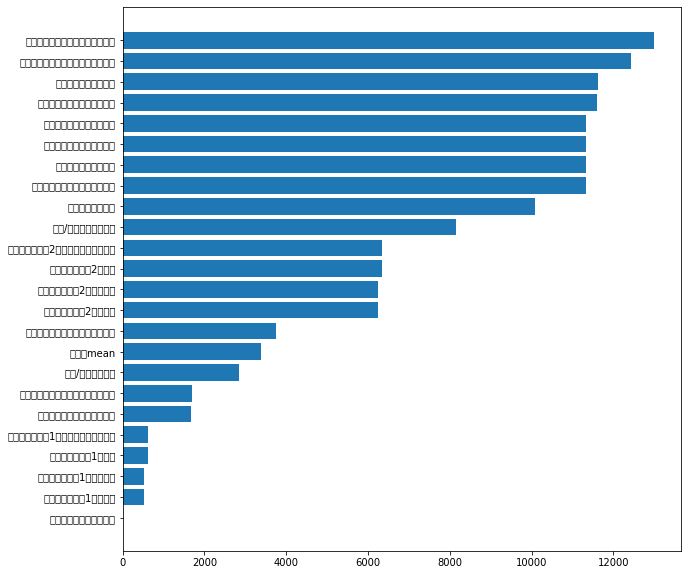

In [28]:
sorted_index = np.argsort(no_df2["num"])[::1]

plt.figure(figsize=(10,10))
plt.barh(no_df2.index[sorted_index], no_df2["num"][sorted_index] )

In [29]:
# 欠損している数値カラム
no_float_col = list(no_df2[no_df2["type"] != "object"].index)
no_float_col.remove("応募数mean")

# 欠損しているカテゴリカラム
no_obj_col = list(no_df2[no_df2["type"] == "object"].index)

### float

In [30]:
no_df2.loc[no_float_col,:]

,num,type
（紹介予定）入社後の雇用形態,11335,float64
（派遣先）配属先部署 男女比 男,1685,float64
（派遣先）配属先部署 人数,1670,float64
勤務地 最寄駅1（分）,622,float64
勤務地 最寄駅2（駅からの交通手段）,6332,float64
（派遣先）配属先部署 平均年齢,3746,float64
給与/交通費 給与上限,8153,float64
勤務地 最寄駅1（駅からの交通手段）,622,float64
勤務地 最寄駅2（分）,6332,float64


In [31]:
all_df.corr()[no_float_col][abs(all_df.corr()[no_float_col]) > 0.1]

,（紹介予定）入社後の雇用形態,（派遣先）配属先部署 男女比 男,（派遣先）配属先部署 人数,勤務地 最寄駅1（分）,勤務地 最寄駅2（駅からの交通手段）,（派遣先）配属先部署 平均年齢,給与/交通費 給与上限,勤務地 最寄駅1（駅からの交通手段）,勤務地 最寄駅2（分）
職場の様子,0.101371,NaN,NaN,NaN,NaN,-0.119807,NaN,NaN,NaN
（紹介予定）入社後の雇用形態,1.000000,-0.137424,0.181031,NaN,NaN,NaN,NaN,NaN,NaN
休日休暇(月曜日),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
（派遣先）配属先部署 男女比 男,-0.137424,1.000000,NaN,NaN,NaN,0.192799,NaN,0.111601,NaN
大手企業,0.192758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
交通費別途支給,NaN,NaN,NaN,NaN,0.104895,NaN,-0.159710,NaN,NaN
（派遣先）配属先部署 人数,0.181031,NaN,1.000000,NaN,NaN,-0.102893,NaN,NaN,NaN
残業月20時間以上,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
職種コード,-0.126745,NaN,NaN,NaN,NaN,NaN,0.115593,NaN,NaN
1日7時間以下勤務OK,0.271299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# sns.pairplot(all_df[no_float_col + ["応募数mean"]], plot_kws={'alpha': 0.2})

#### 欠損値の補完

In [33]:
# カテゴリ変数と考えられるものはNAで補完
cols = ["（紹介予定）入社後の雇用形態", "勤務地　最寄駅2（駅からの交通手段）",
        "勤務地　最寄駅1（駅からの交通手段）"
       ]
for col in cols:
    all_df[col] = all_df[col].fillna("NA")

# 数値変数として扱いたいものは-9999で補完¶
cols2 = ["（派遣先）配属先部署　男女比　男", "（派遣先）配属先部署　人数",
         "勤務地　最寄駅1（分）", "（派遣先）配属先部署　平均年齢", 
         "給与/交通費　給与上限", "勤務地　最寄駅2（分）"
        ]
for col in cols2:
    all_df[col] = all_df[col].fillna(-9999)

 （紹介予定）入社後の雇用形態 

In [34]:
# plt.scatter(all_df["正社員登用あり"], all_df["（紹介予定）入社後の雇用形態"], alpha=0.01)
# plt.xlabel("正社員登用あり")
# plt.ylabel("（紹介予定）入社後の雇用形態")

In [35]:
# # 欠損値はすべて"正社員登用あり"==0.0
# # 2.0で埋める
# all_df["（紹介予定）入社後の雇用形態"][all_df["正社員登用あり"]==0.0] = all_df["（紹介予定）入社後の雇用形態"][all_df["正社員登用あり"]==0.0].fillna(2.0)

# all_df["（紹介予定）入社後の雇用形態"].value_counts()
# 0.0と2.0を見分ける方法を探す

In [36]:
# for col in no_float_col:
#     all_df[col] = all_df[col].fillna(all_df[col].median())

### object

In [37]:
no_df2.loc[no_obj_col,:]

,num,type
勤務地 最寄駅2（駅名）,6255,object
（紹介予定）雇用形態備考,11335,object
勤務地 最寄駅2（沿線名）,6255,object
（派遣先）概要 勤務先名（漢字）,12436,object
（紹介予定）入社時期,11335,object
（派遣先）勤務先写真ファイル名,12991,object
（紹介予定）年収・給与例,11335,object
勤務地 最寄駅1（沿線名）,519,object
（紹介予定）休日休暇,11611,object
（派遣先）職場の雰囲気,2,object


#### 欠損値の補完

In [38]:
# 欠損値をNAで埋める
for col in no_obj_col[:-1]:
    all_df[col] = all_df[col].fillna("NA")

## 数値変数をカテゴリ変数に

In [39]:
# float_col = all_df.dtypes[all_df.dtypes!="object"].index
# obj_col = all_df.dtypes[all_df.dtypes=="object"].index
# f = pd.DataFrame(all_df[float_col].nunique()[all_df[float_col].nunique()>2])
# o = pd.DataFrame(all_df[obj_col].nunique())
# pd.concat([f, o]).to_csv("df.csv", encoding='utf_8_sig')

In [40]:
float_col = all_df.dtypes[all_df.dtypes!="object"].index
obj_col = all_df.dtypes[all_df.dtypes=="object"].index

In [41]:
all_df[float_col].nunique()[all_df[float_col].nunique()>2]

職場の様子                   3
（派遣先）配属先部署　男女比　男       12
（派遣先）配属先部署　人数         116
職種コード                  14
勤務地　最寄駅1（分）            31
お仕事No.              10975
フラグオプション選択              5
（派遣先）配属先部署　平均年齢        51
会社概要　業界コード             13
勤務地　都道府県コード            47
給与/交通費　給与上限           126
仕事の仕方                   5
給与/交通費　給与下限           139
勤務地　市区町村コード           151
勤務地　最寄駅2（分）            33
応募数mean               221
all_count               6
NaN_num                23
dtype: int64

In [42]:
for col in ["フラグオプション選択", "職種コード", "会社概要　業界コード", "仕事の仕方", "勤務地　市区町村コード"]:
    all_df[col] = all_df[col].astype(str)

## 時系列データ
https://note.nkmk.me/python-pandas-datetime-timestamp/

able_code

### 掲載開始日と勤務開始日

In [43]:
all_df['掲載期間　開始日'] = pd.to_datetime(all_df['掲載期間　開始日'], format="%Y/%m/%d")
all_df['掲載期間　終了日'] = pd.to_datetime(all_df['掲載期間　終了日'], format="%Y/%m/%d")
all_df['期間・時間　勤務開始日'] = pd.to_datetime(all_df['期間・時間　勤務開始日'], format="%Y/%m/%d")

# "勤務開始-掲載開始"カラムを追加
all_df["勤務開始-掲載開始"] = (all_df['期間・時間　勤務開始日'] - all_df['掲載期間　開始日'])
# 日数を取り出す
all_df["勤務開始-掲載開始"] = all_df["勤務開始-掲載開始"].dt.days
all_df["勤務開始-掲載開始"].head()

0    40
1    -1
2    -1
3    -1
4    -1
Name: 勤務開始-掲載開始, dtype: int64

In [44]:
all_df = all_df.drop(columns=['掲載期間　開始日', "掲載期間　終了日", "期間・時間　勤務開始日"])
all_df.shape

(13062, 120)

### 勤務時間関連
https://niwakomablog.com/python-number-extract/

In [45]:
all_df["期間・時間　勤務時間"].value_counts()[all_df["期間・時間　勤務時間"].value_counts()>10]

9:00〜17:30　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          927
9:00〜18:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          910
9:00〜17:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          842
8:30〜17:30　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          354
9:30〜18:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          215
10:00〜19:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。         206
9:00〜17:45　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          182
9:30〜17:30　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          169
10:00〜18:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。         167
8:30〜17:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          149
10:00〜16:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。         142
8:30〜17:15　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          136
9:30〜18:30　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          135
10:00〜17:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。         132
9:00〜17:30　<BR>※残業はほとんどありません。<BR>※休憩は４５分です。          116
8:00〜17:00　<BR>※残業はほとんどありません。<BR>※休憩は６０分です。          114
9:00〜18:00　<BR>※休憩は６０分です。                             97
9:00〜17:30　<BR>※休憩は６０分です。      

In [46]:
all_df["workingstart"] = all_df["期間・時間　勤務時間"].str.split("〜", expand=True)[0]
all_df["workingend"] = all_df["期間・時間　勤務時間"].str.split("〜", expand=True)[1].str.split("　", expand=True)[0]

# datetime型に変換
all_df["workingstart"] = pd.to_datetime(all_df['workingstart'], format='%H:%M')
all_df["workingend"] = pd.to_datetime(all_df['workingend'], format='%H:%M')
all_df["workingstart"].head()

0   1900-01-01 09:30:00
1   1900-01-01 09:00:00
2   1900-01-01 09:00:00
3   1900-01-01 09:00:00
4   1900-01-01 08:30:00
Name: workingstart, dtype: datetime64[ns]

In [47]:
# 勤務時間(分)
all_df["workingtime_m"] = (all_df["workingend"] - all_df["workingstart"]).astype('timedelta64[m]') 
all_df["workingtime_m"].head()

0    420.0
1    480.0
2    510.0
3    520.0
4    480.0
Name: workingtime_m, dtype: float64

In [48]:
#all_df["workrest"] = all_df["期間・時間　勤務時間"].apply(mojimoji.zen_to_han)

# 休憩と<BD>,分に挟まれた文字列を抽出
all_df["workingrest"] = all_df["期間・時間　勤務時間"].str.split("休憩", expand=True)[1].str.split("分", expand=True)[0].str.split("<BR>", expand=True)[0]
# 文字列から数字を抽出
import re
all_df["workingrest"] = all_df["workingrest"].apply(lambda x: re.sub(r'\D', '', str(x)))

# 例外を変換
all_df["workingrest"][all_df["workingrest"]==""] = "０"
all_df["workingrest"][all_df["workingrest"]=="１"] = "６０"
all_df["workingrest"][all_df["workingrest"]=="６０９０"] = "７５"
all_df["workingrest"][all_df["workingrest"]=="１３３０１６００"] = "０"
all_df["workingrest"][all_df["workingrest"]=="１０３０１３３０"] = "０"

# intに変換
all_df["workingrest"] = all_df["workingrest"].apply(int)

C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ishizuka\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [49]:
all_df["workingrest"].value_counts()

60     11586
45       832
50       179
0        114
75        94
55        64
90        59
70        52
65        47
80        20
30         7
85         3
120        2
95         1
100        1
10         1
Name: workingrest, dtype: int64

In [50]:
# 実働時間(分)
all_df["productiontime_m"] = (all_df["workingtime_m"] - all_df["workingrest"])#.astype('timedelta64[m]') 
all_df["productiontime_m"].head()

0    360.0
1    420.0
2    450.0
3    460.0
4    420.0
Name: productiontime_m, dtype: float64

In [51]:
# datetime型のカラムをobject型に変換
for i in list(all_df.dtypes[all_df.dtypes=="datetime64[ns]"].index):
    all_df[i] = all_df[i].astype(str) 

In [52]:
#all_df = all_df.drop(columns=["期間・時間　勤務時間"])

### 期間･時間　備考

In [53]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [54]:
all_df["期間･時間　備考"].value_counts(dropna=False)

NaN                               10070
◆開始日はご相談可能です！詳しくはお問い合わせください！       2949
◆開始日はご相談可能です。詳しくはお問い合せください！          23
◆開始日はご相談可能です！詳しくはお問い合せください！           7
◆開始日はご相談可能です。詳しくはお問合せください！            7
◆開始日はご相談可能です！詳しくはお問合せください！            4
◆開始日はご相談可能です。詳しくはお気軽にお問合せください！        1
◆開始日はご相談可能です！詳しくはお問い合わせ下さい！           1
Name: 期間･時間　備考, dtype: int64

In [55]:
# NaN_期間･時間　備考を追加したので削除
all_df = all_df.drop(columns=["期間･時間　備考"])

## 言語処理
(Janomeで日本語の形態素解析)https://note.nkmk.me/python-janome-tutorial/

(janomeで名詞をいい感じに取り出す)https://qiita.com/Hiroyuki1993/items/42273d805c7ddf5a64d2

(文字列を置換)https://note.nkmk.me/python-str-replace-translate-re-sub/

In [56]:
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.charfilter import *
from janome.tokenfilter import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline

### お仕事名

In [57]:
all_df["お仕事名"].value_counts(dropna=False)[all_df["お仕事名"].value_counts(dropna=False)>1]

◆正社員前提☆賞与年２回／５ヶ月！バックオフィス業務全般◆        4
★残業少なめで魅力的★システム開発会社／データ入力など！         3
交通費支給あり！ピタッと１７時に帰れる！未経験でも大丈夫！        3
時給1700円！１７時半で帰れる！食品商社でのアシスタント★       3
基本１７時半定時★1700円☆知名度抜群！ＥＣモール運営会社       3
                                    ..
保険組合の事務◎6ヶ月後正社員◎年収390万円〜◎なんと賞与4回!    2
●活気ある雰囲気●東証一部上場企業で働こう！Ｂ／Ｌ作成など        2
交通費一部支給！１８時退社☆外資系☆カスタマーサポートなど        2
＼代官山エリア／時給1700円*残ナシ!オシャレも◎書類の管理など    2
★１７時半で帰れる★精密機器メーカー！伝票起票など！           2
Name: お仕事名, Length: 1938, dtype: int64

In [58]:
import string
string.punctuation + "◆▼★②●☆■★【】『』「」、♪"

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~◆▼★②●☆■★【】『』「」、♪'

In [59]:
# %%time
# # 高速化試行
# def func(x):
#     char_filters = [UnicodeNormalizeCharFilter(),
#                     RegexReplaceCharFilter(r"[!$%&\'()*+,-./:;<=>?@\\^_`{|}~◆▼★②●☆■★【】『』「」、♪≪≫]", " ")
#                    ]

#     token_filters = [CompoundNounFilter(),
#                      POSKeepFilter(['名詞']),
#                      LowerCaseFilter()
#                      #,ExtractAttributeFilter('surface') # これを付けるとエラーが出る
#                     ]

#     a = Analyzer(char_filters=char_filters,  token_filters=token_filters)
    
#     b = " ".join([token.surface for token in a.analyze(x)])
#     return b


# import pandas as pd
# import dask.dataframe as dd
# from dask.multiprocessing import get

# ddf = dd.from_pandas(all_df['お仕事名'], npartitions=2)
# meta = ddf.head(1).apply(func)
# all_df['お仕事名_token'] = ddf.apply(func, meta=meta).compute(scheduler='processes')
# all_df["お仕事名_token"].head()

In [60]:
# Janome で形態素解析
# トークン化の関数を定義
def token1(X):
    XX = X.copy()
    XX = XX["お仕事名"]
        
    char_filters = [UnicodeNormalizeCharFilter(),
                    RegexReplaceCharFilter(r"[!$%&\'()*+,-./:;<=>?@\\^_`{|}~◆▼★②●☆■★【】『』「」、♪≪≫]", " ")
                    ]

    token_filters = [CompoundNounFilter(),
                    POSKeepFilter(['名詞']),
                    LowerCaseFilter()
                    #,ExtractAttributeFilter('surface') # これを付けるとエラーが出る
                    ]

    a = Analyzer(char_filters=char_filters,  token_filters=token_filters)

    X_token = XX.apply(lambda x: " ".join([token.surface for token in a.analyze(x)]))

    return X_token

# トークン化
all_df["お仕事名_token"] = token1(all_df)

In [61]:
%%time
test_token1 = token1(test_x)
test_token1

Wall time: 14.9 s


0               16時半 学校法人 窓口 受付 経験ok
1       保険組合 事務 6ヶ月後正社員 年収390万円 賞与4回
2             3ヶ月後正社員 大手損保会社 事務 社員食堂
3       未経験 6ヶ月後社員 賞与年4 5ヶ月分 営利団体 事務
4        正社員前提 年収350 400万 17時ピタ 書類作成
                    ...             
3386        基本定時 経験 ok 確認業務 サンシャイン60
3387       引継ぎ 大手メーカー 保守契約管理業務 1800円
3388         外資系 18時 経験ok 1700 データ入力
3389     大手メーカー ハジメテ 安心 事務アシスタント 駅チカ
3390         社員登用予定 賞与年2回 18時帰り 採用業務
Name: お仕事名, Length: 3391, dtype: object

In [62]:
# パイプライン

y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
X = all_df['お仕事名_token'][:len(y)]

pipe_1 = make_pipeline(CountVectorizer(),           # BoW を計算
                       TfidfTransformer(norm='l2'),  # tf-idf変換
                       Lasso(max_iter=10000, random_state=4)) # 予測

param_grid = {"lasso__alpha": [0.0001, 0.001]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_1 = GridSearchCV(pipe_1, param_grid=param_grid, cv=kfold,
                      scoring="neg_mean_squared_error", n_jobs=-1)
grid_1.fit(X, y)

print(grid_1.best_params_)
print(np.sqrt(-grid_1.best_score_))

# #pickle化
# import pickle
# with open("grid_1.pickle", mode="wb") as f:
#     pickle.dump(grid_1, f)

{'lasso__alpha': 0.0001}
0.6209207436312624


In [63]:
# 予測値を特徴量に追加
all_df["お仕事名_pred"] = grid_1.predict(all_df["お仕事名_token"])

all_df["お仕事名_pred"]

0        0.976537
1        1.500810
2        1.487396
3        0.621543
4        0.741246
           ...   
13057    0.516079
13058    0.396067
13059    0.326981
13060    0.438645
13061    0.566950
Name: お仕事名_pred, Length: 13062, dtype: float64

In [64]:
# tf-idfが高いまたは低い特徴量
count = grid_1.best_estimator_.named_steps["countvectorizer"]
tfid = grid_1.best_estimator_.named_steps["tfidftransformer"]

X_token = count.fit_transform(all_df["お仕事名_token"])
X_tfid = tfid.fit_transform(X_token)

max_value = X_tfid.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(count.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:50]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-50:]]))

Features with lowest tfidf:
['17' '開発企業' '人気ゲーム' 'ヒント' '運営企業' '美ボディ' 'ヨガ' 'たくさん' '経験ok' '印刷'
 '広告チェックetc' '宝町そば' '扶養内ok3' '4時間' '公的機関' '安定力' '田町' '正社員' '出張' '文章'
 '保育園サポート会社' '子ども達' '元気' '保育' '設計補助' '30ピタ帰り' '学生証' '物販サポ' '上映' 'わたし' '映画'
 '4日勤務ok' '伊勢原' '発券機' '故障受付' 'エッセンシャルオイル製造会社' 'アロマ' '香り' '保管' '太陽光発電事業'
 '設備設計会社' '成長中' '衣料' 'モノ' '思い出' 'ギフトチケットサイト' '人気' '会社' '理系' '文系']
Features with highest tfidf: 
['2020年3月' '日程調整' '書類作成' '労務関連業務etc' '市場調査サポート' '一人事務' '時短定時帰り' '定時18時ピタ'
 '大手自動車ディーラー' '各種データ照合業務' '基本17時帰り' 'ドキュメント作成業務' '伝票計上' '契約書製本業務' 'テープ'
 '社内スケジュール調整' '17時定時退社' 'インテリアメーカー' '大手医療機器開発会社' '営業アシスタントメイン'
 '大手itサービス事業会社' 'カスタマーサポート業務' 'ソニー生命保険' 'リクルートマーケティングパートナーズ' '連結決算業務'
 '大手itソリューション事業会社' 'カスタマーサポートetc' 'ソフトウェア開発企業' '伊藤忠テクノソリューションズ'
 'データ読み取り業務' 'ウレシイ10時出勤' '12月以降スタート開始日調整' '厚木駅チカ' '報告資料作成' 'プランニングボード作成'
 '営業アシスタント事務' 'ウレシイ9時30分出勤' 'みなとみらい総合受付' '時短勤務相談可能' '事務サポート' '基本17時15分'
 '社会保険関連業務' '工事発注管理業務' 'スピーカー関連部品調達業務' 'チェックインカウンター対応' '業務フォロー有'
 '部署内アシスタント業務' 'ペット用品販売会社' '会計ソフト会員向けユーザーサ

### 仕事内容

In [65]:
all_df["仕事内容"].value_counts(dropna=False)[all_df["仕事内容"].value_counts(dropna=False)>1]

経験活かして働こう！幅広い世代の方が活躍されています！<BR>【お願いしたいお仕事の内容】<BR>後方事務・窓口業務として口座開設、預金入出金、公共料金受付、伝票処理、国内為替業務などをお願いします。<BR><BR>▼こちらのお仕事のほかにも多数あります▼<BR>大手・有名企業から公的機関まで<BR>業界・職種・勤務地も幅広くご用意しています◎<BR>勤務スタート日はご相談OK！<BR>今なら11月・12月スタートのお仕事もたくさん＊                                                                                                                      3
経験活かして働こう！幅広い世代の方が活躍されています！<BR>【お願いしたいお仕事の内容】<BR>後方事務・窓口業務として口座開設、預金入出金、公共料金受付、伝票処理、国内為替業務などをお願いします。<BR><BR>▼こちらのお仕事のほかにも多数あります▼<BR>大手・有名企業から公的機関まで<BR>業界・職種・勤務地も幅広くご用意しています◎<BR>勤務スタート日はご相談OK！<BR>今なら12月・1月スタートのお仕事もたくさん＊                                                                                                                       3
様々な通信サービスを行っている会社です♪研修やロープレ練習があり未経験でも安心してスタートできます！<BR>【お仕事の内容】<BR>各営業の担当エリア法人宛へのコール⇒海外Ｗｉｆｉレンタルサービス加入のご案内およびアポイント取得⇒データ入力・営業への取り次ぎなどをお願いします。<BR>※架電リストあります。<BR><BR>▼こちらのお仕事のほかにも多数あります▼<BR>大手・有名企業から公的機関まで<BR>業界・職種・勤務地も幅広くご用意しています◎<BR>勤務スタート日はご相談OK！<BR>今なら11月・12月スタートのお仕事もたくさん＊                                                 

In [66]:
# MeCabで形態素解析

import MeCab

# 取り出したい品詞
select_conditions = ['名詞']

# 分かち書きオブジェクト
tagger = MeCab.Tagger('')

# Neologdの指定版 最新語に対応する
# tagger = MeCab.Tagger('-d /usr/lib64/mecab/dic/mecab-ipadic-neologd')

# 安定するらしい
tagger.parse('')


def wakati_text(text):
    # 分けてノードごとにする
    node = tagger.parseToNode(text)
    terms = []

    while node:
        # 単語
        term = node.surface
        # 品詞
        pos = node.feature.split(',')[0]
        # もし品詞が条件と一致してたら
        if pos in select_conditions:
            terms.append(term)

        node = node.next

    # 連結おじさん
    text_result = ' '.join(terms)
    return text_result

# トークン化
all_df["仕事内容_token"] = all_df["仕事内容"].apply(wakati_text)

In [67]:
%%time
# jamoneでは4min 52s
test_token = test_x["仕事内容"].apply(wakati_text)
test_token

Wall time: 3.73 s


0       派遣 スタッフ 年齢 層 方々 活躍 中 基本 土日 祝 休み プライベート 充実 自転車 ...
1       保険 組合 オシゴト 女性 活躍 中 職場 駅 きれい 自社 ビル ♪♪< BR >【 お願...
2       大手 損保 会社 産休 育休 取得 実績 企業 さん ♪ ランチ 社員 食堂 完備 職場 ♪...
3       安心 安定 営利 団体 雰囲気 職場 環境 < BR >【 ＯＡ 事務 < BR > 会議 ...
4       金融 機関 子育て 世代 活躍 中 雰囲気 職場 業務 就業 方 在籍 < BR >【 ＯＡ...
                              ...                        
3386    法律 事務所 業務 就業 方 安心 キレイ オフイス 仕事 ！< BR >【 ＯＡ 事務 <...
3387    複合 機 プリンター 精密 機器 メーカー 残業 少なめ プライベート 両立 < BR >【...
3388    日 用品 卸売 会社 目黒 駅 カジュアル デニム 就業 ＯＫ 残業 仕事 < BR >【 ...
3389    基本 土日 祝 休み 当社 派遣 スタッフ 活躍 中 残業 収入 < BR >【 仕事 内容...
3390    福祉 施設 フード サービス 事業 会社 ♪ 若手 メンバー 活躍 中 人気 紹介 予定 派...
Name: 仕事内容, Length: 3391, dtype: object

In [68]:
# パイプライン

y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
X = all_df["仕事内容_token"][:len(y)]

pipe_2 = make_pipeline(CountVectorizer(),           # BoW を計算
                       TfidfTransformer(norm='l2'),  # tf-idf変換
                       Lasso(max_iter=10000, random_state=4)) # 予測

param_grid = {"lasso__alpha": [0.0001]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_2 = GridSearchCV(pipe_2, param_grid=param_grid, cv=kfold,
                      scoring="neg_mean_squared_error", n_jobs=-1)
grid_2.fit(X, y)

print(grid_2.best_params_)
print(np.sqrt(-grid_2.best_score_))

# pickle化
import pickle
with open("grid_2.pickle", mode="wb") as f:
    pickle.dump(grid_2, f)

{'lasso__alpha': 0.0001}
0.6341545146546935


In [69]:
# 予測値を特徴量に追加
all_df["仕事内容_pred"] = grid_2.predict(all_df['仕事内容_token'])

all_df["仕事内容_pred"]

0        0.501868
1        1.050894
2        1.130693
3        1.309331
4        1.015649
           ...   
13057    0.317322
13058    0.230044
13059    0.145005
13060    0.261498
13061    0.223503
Name: 仕事内容_pred, Length: 13062, dtype: float64

In [70]:
# tf-idfが高いまたは低い特徴量
count = grid_2.best_estimator_.named_steps["countvectorizer"]
tfid = grid_2.best_estimator_.named_steps["tfidftransformer"]

X_token = count.fit_transform(all_df["仕事内容_token"])
X_tfid = tfid.fit_transform(X_token)

max_value = X_tfid.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(count.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:50]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-50:]]))

Features with lowest tfidf:
['ok' 'こちら' '用意' 'ほか' '職種' '12' '11' '公的' '有名' '業界' 'たくさん' '機関' 'お願い' '相談'
 '多数' '大手' '10' '得喪' '電算システム' '査読' '企業' '収容' '位置' 'ホリデー' 'ライフサイクル' '平準'
 'ｐｃｔ' '単語' '残業' '当社' '進学' 'ｔｏｅｆｌ' '復活' '学位' 'ファイリング' '土日' '新入生' 'ｖｅｒ'
 '代筆' '解明' '不一致' '手交' '補整' '取り外し' 'クリエィティブ' 'ネイティブ' 'ビルタワー' 'クリアランス'
 'ウォッチング' 'コツコツ']
Features with highest tfidf: 
['看板' '絵画' '歯科' '退去' '講演' '留学生' 'ゲストハウス' '検査' 'ｆｐ' '英語' '展示' 'モデルハウス'
 'レンタカー' '通訳' '教習所' '翻訳' 'ローン' '画像' '申告' '写真' '社宅' 'スタジオ' '印紙' '相殺' '入札'
 '講座' '事案' '奨励' '返済' 'プレス' '認証' '求人' '衣装' 'ａｄ' '輸送' '予約' 'スペイン' '課題' '面談'
 '資金' '時半' '就職' '修理' 'ｃｍ' '実験' '面接' '配置' '旅行' '研究' '調査']


### お仕事のポイント（仕事PR）
(PythonとMecabで特定の品詞の単語だけ取り出す)https://qiita.com/ganariya/items/68fdcfed953f066ad4b7

In [71]:
all_df["お仕事のポイント（仕事PR）"].value_counts(dropna=False)[all_df["お仕事のポイント（仕事PR）"].value_counts(dropna=False)>1]

◆大手企業で働く絶好のチャンス！敷地内に食堂・コンビニ・ＡＴＭ完備！分煙で快適な職場！服装はオフィスカジュアルＯＫ！当社含む派遣スタッフ多数就業中！同業務の方もいるので安心です！             4
◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！禁煙で快適！オフィスカジュアルＯＫ！近くには飲食店・コンビニあり！残業ほぼなし！人気の紹介予定派遣です！    4
◆人気の紹介予定派遣のお仕事！駅チカで通勤に便利！禁煙で快適な職場環境！服装はオフィスカジュアルＯＫ！残業がほとんどないのでプライベートと両立したい方必見ですよ！                     4
◆複数駅からアクセス可能！キレイなオフィスビル！周りに飲食店多数あり！オフィスカジュアルＯＫ！派遣スタッフも活躍中！分煙された快適な環境です！                               4
◆駅チカで通勤に便利！分煙で快適な職場！服装はオフィスカジュアルＯＫ！周辺にはコンビニ・飲食店あり！同業務の方もいるので安心です！                                     4
                                                                                                     ..
◆最寄駅から徒歩圏内♪近くにコンビニもあり何かと便利！リフレッシュできる休憩室完備！同業務の方が複数名いるので安心！少し遅めの始業＆残業ほぼなしでプライベートとの両立も可能です！             2
◆大手企業で働こう！駅チカの綺麗なビル！交通費一部支給あり！フリーアドレス制！禁煙で快適な環境！近くには飲食店・コンビニもあり便利！残業がほとんどなくプライベートも充実できますよ☆            2
◆開始日相談可能です♪大手企業での就業！駅直結のオフィスタワー内勤務！飲食店・コンビニあり！オフィスカジュアル就業！当社スタッフも活躍中！２０２１年３月までのお仕事です（延長の可能性あり）！       2
◆御成門駅すぐ！オフィカジＯＫ！実働５ｈと短め！週３日勤務！朝ゆっくり１０時始業＆残業ほぼなし！同業務者１名！禁煙で快適な環境！

In [72]:
# jamomeで形態素解析

# トークン化の関数を定義
def token3(X):
    XX = X.copy()
    XX = XX["お仕事のポイント（仕事PR）"]
        
    char_filters = [UnicodeNormalizeCharFilter(),
                    RegexReplaceCharFilter(r"[!$%&\'()*+,-./:;<=>?@\\^_`{|}~◆▼★②●☆■★【】『』「」、♪≪≫]", " ")
                    ]

    token_filters = [CompoundNounFilter(),
                    POSKeepFilter(['名詞']),
                    LowerCaseFilter()
                    #,ExtractAttributeFilter('surface') # これを付けるとエラーが出る
                    ]

    a = Analyzer(char_filters=char_filters,  token_filters=token_filters)

    X_token = XX.apply(lambda x: " ".join([token.surface for token in a.analyze(x)]))

    return X_token

all_df["お仕事のポイント_token"] = token3(all_df)

In [73]:
%%time
test_token3 = token3(test_x)
test_token3

Wall time: 52.6 s


0       業務就業 方 在籍 安心 オシャレ オフィカジok 給湯設備 一息 休憩室完備 近く 飲食店...
1       2 駅 アクセス 飲食店 コンビニ 近くお昼 ラクチン 禁煙 クリーン 環境 オフィスカジュ...
2       開始日相談可能 複数路線 利用 便利 休憩室完備 自社ビル 当社スタッフさん就業中 禁煙 快...
3       最寄駅 徒歩圏内 複数路線 利用可能 近く コンビニ カフェ 便利 分煙 快適 人気 紹介予...
4       駅 飲食店 コンビニ 近く 便利 禁煙 クリーン 環境 カジュアル デニムok 給湯設備完備...
                              ...                        
3386    飲食店 コンビニ 近くお昼 ラクチン 当社スタッフ就業中 オフィカジok 禁煙 タバコ 方 ...
3387    開始日相談可能 浜松町駅 徒歩圏内 近く 飲食店 コンビニ 便利 オフィカジok 分煙 快適...
3388    業務 就業 方 安心 禁煙 クリーン 環境 コーヒーマシン 便利 給湯設備完備 飲食店 コン...
3389    自社ビル勤務 制服 更衣室利用ok 分煙オフィス たばこ 苦手 方 快適 給湯設備 休憩室完...
3390    駅直結 近く 飲食店 コンビニ お昼 ラクチン 便利 給湯設備 完備 タバコ 苦手 方 快適...
Name: お仕事のポイント（仕事PR）, Length: 3391, dtype: object

In [74]:
# パイプライン

y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
X = all_df['お仕事のポイント_token'][:len(y)]

pipe_3 = make_pipeline(CountVectorizer(),           # BoW を計算
                       TfidfTransformer(norm='l2'),  # tf-idf変換
                       Lasso(max_iter=10000, random_state=4)) # 予測

param_grid =  {"lasso__alpha": [0.0001, 0.01, 0.1, 1, 10]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_3 = GridSearchCV(pipe_3, param_grid=param_grid, cv=kfold,
                      scoring="neg_mean_squared_error", n_jobs=-1)
grid_3.fit(X, y)

print(grid_3.best_params_)
print(np.sqrt(-grid_3.best_score_))

# pickle化
import pickle
with open("grid_3.pickle", mode="wb") as f:
    pickle.dump(grid_3, f)

{'lasso__alpha': 0.0001}
0.6491184440071971


In [75]:
# 予測値を特徴量に追加
all_df["お仕事のポイント_pred"] = grid_3.predict(all_df['お仕事のポイント_token'])

all_df["お仕事のポイント_pred"]

0        0.353042
1        1.340081
2        0.832140
3        0.752270
4        0.498971
           ...   
13057    0.365376
13058    0.224365
13059    0.344567
13060    0.229446
13061    0.383651
Name: お仕事のポイント_pred, Length: 13062, dtype: float64

In [76]:
# tf-idfが高いまたは低い特徴量
count = grid_3.best_estimator_.named_steps["countvectorizer"]
tfid = grid_3.best_estimator_.named_steps["tfidftransformer"]

X_token = count.fit_transform(all_df["お仕事のポイント_token"])
X_tfid = tfid.fit_transform(X_token)

max_value = X_tfid.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(count.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:50]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-50:]]))

Features with lowest tfidf:
['飲食店' 'コンビニ' '快適' 'オフィカジok' '残業' '千日前線' '中央線' '梱包' '人員管理' '出荷'
 'オペレーション管理' '入荷' '在庫管理' '休憩室完備' '国内' '発揮' '給与' 'これ' '談笑' '弊社スタッフさん' '休憩中'
 '1人' '畳スペース' 'ソファ' '動画' 'sns' '紹介' 'ヘアアレンジ' '座学研修' '期間中' '平日9' '延長' '可能性'
 '愛用者' '著名人' 'スキンケアシリーズ' '自然' 'こだわり' '青山一丁目' '企画販売' 'ハーブ' '1度' '会社行事'
 'ペットボトルドリンク50円' '飲食無料' 'コーヒーマシン完備' '四半期' '部屋' '19時半' '20時']
Features with highest tfidf: 
['30' '中目黒駅トホ1分' '公共交通費orガソリン代支給' '週2日勤務' '5ヵ月' '渋谷駅徒歩圏内' '長野駅' '20始業'
 'グループ自社ビル' '業務就業者多数' '浦安駅' '中目黒エリア' '大手グループ' '大手町駅直結オフィスタワー' '中目黒駅チカ'
 '高崎駅' '私服ok' '運動不足解消' '渋谷駅近' '気軽' '朝ラクラク10時始業' '渋谷駅トホ圏内' '2022年3月'
 '駅徒歩圏内' '篠崎駅' '20代女性' '10名' '実働6時間半' '禁煙環境便利' '2022年10月' '業務就業者複数'
 'ラクラク便利' '1年半' '路線武蔵浦和駅' '10時半出社' '大宮駅直結' '新浦安駅' '松山市駅' '目黒駅' '45'
 '東新宿駅チカ' '立川駅徒歩圏内' '1階ショールーム' '女性社員' '勝田駅' '正社員登用制度' '業務多数' '戸頭駅'
 '広尾駅トホ2分の自社ビル' '賞与2回']


### (派遣先）配属先部署

In [77]:
all_df["（派遣先）配属先部署"].value_counts(dropna=False)[all_df["（派遣先）配属先部署"].value_counts(dropna=False)>1]

事務処理を行う部署                1052
事務部門                      837
営業部                       318
総務部                       311
営業所                       291
                         ... 
開発部門の事務処理                   2
機械事業部                       2
薬事申請事務のアシスタントを行っている部署       2
特定保健指導を中心とした保健事業部門          2
サービス戦略部                     2
Name: （派遣先）配属先部署, Length: 1376, dtype: int64

In [78]:
# Janome で形態素解析

# トークン化の関数を定義
def token4(X):
    XX = X.copy()
    XX = XX["（派遣先）配属先部署"]
        
    char_filters = [UnicodeNormalizeCharFilter(),
                    RegexReplaceCharFilter(r"[!$%&\'()*+,-./:;<=>?@\\^_`{|}~◆▼★②●☆■★【】『』「」、♪≪≫]", " ")
                    ]

    token_filters = [#CompoundNounFilter(), # 複合する名詞を連結してしまう
                    POSKeepFilter(['名詞']),
                    LowerCaseFilter()
                    #,ExtractAttributeFilter('surface') # これを付けるとエラーが出る
                    ]

    a = Analyzer(char_filters=char_filters,  token_filters=token_filters)

    X_token = XX.apply(lambda x: " ".join([token.surface for token in a.analyze(x)]))

    return X_token

all_df["（派遣先）配属先部署_token"] = token4(all_df)

In [79]:
%%time
test_token4 = token4(test_x)
test_token4

Wall time: 5.03 s


0       会計 ソフト 入力 部署
1               総務 部
2               経理 部
3            企画 調整 部
4           事務 処理 部署
            ...     
3386        事案 受付 部署
3387         販売 管理 部
3388            管理 部
3389      修理 受付 センター
3390        人材 採用 本部
Name: （派遣先）配属先部署, Length: 3391, dtype: object

In [80]:
# パイプライン

y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
X = all_df['（派遣先）配属先部署_token'][:len(y)]

pipe_4 = make_pipeline(CountVectorizer(stop_words=["部","部署","署","部門","所"]), # BoW を計算
                       TfidfTransformer(norm='l2'),  # tf-idf変換
                       Lasso(max_iter=10000, random_state=4)) # 予測

param_grid =  {"lasso__alpha": [0.0001, 0.001, 0.01]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_4 = GridSearchCV(pipe_4, param_grid=param_grid, cv=kfold,
                      scoring="neg_mean_squared_error", n_jobs=-1)
grid_4.fit(X, y)

print(grid_4.best_params_)
print(np.sqrt(-grid_4.best_score_))

# pickle化
import pickle
with open("grid_4.pickle", mode="wb") as f:
    pickle.dump(grid_4, f)

{'lasso__alpha': 0.001}
0.6557087637606449


In [81]:
# 予測値を特徴量に追加
all_df["（派遣先）配属先部署_pred"] = grid_4.predict(all_df["（派遣先）配属先部署_token"])

all_df["（派遣先）配属先部署_pred"]

0        0.410425
1        0.404205
2        0.439518
3        0.410416
4        0.439518
           ...   
13057    0.439518
13058    0.442515
13059    0.445271
13060    0.439518
13061    0.445958
Name: （派遣先）配属先部署_pred, Length: 13062, dtype: float64

In [82]:
# tf-idfが高いまたは低い特徴量
count = grid_4.best_estimator_.named_steps["countvectorizer"]
tfid = grid_4.best_estimator_.named_steps["tfidftransformer"]

X_token = count.fit_transform(all_df["（派遣先）配属先部署_token"])
X_tfid = tfid.fit_transform(X_token)

max_value = X_tfid.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(count.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:50]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-50:]]))

Features with lowest tfidf:
['遺族' '老齢' '規定' '普通' '中心' '指導' '特定' 'ロゴ' '分野' '科学' '国家' '水素' '請負' 'レイ'
 'ブルー' '適正' '過払い' '物質' '有害' 'レセプト' '策定' '約定' 'ラジオ' '外部' '加害' '不貞' '行為'
 '利用' '用紙' '設立' '日本語' '動向' '訪問' '与信' '信用' '共通' '定型' 'トランク' '駐輪場' '団体' '経済'
 '経済学部' '旅程' '扱申込' 'もと' 'db' '新車' 'erp' 'ソフトウェア' 'fax']
Features with highest tfidf: 
['テレフォンバンキング' 'プロジェクト' '経営' 'プロジェクトマネージャーセクション' 'ロジスティクス' '監査'
 'ロードアシスタンスセンター' '発電' '発送' '発行' '下水道' '病院' '不動産' 'リース' '中古' '申請' '生産' '生活'
 '予約' '事務' '生保' '環境' '理工学部' '事務所' '主計' 'セールス' '看護' '研修' 'プロデュース'
 'プロパティマネジメント' 'プロモーション' 'ペイロールサービス' '精査' '米穀' '管財' '管理' 'マネジメント' 'リフォーム'
 '窓口' '穀物' 'マンション' 'マーケティング' 'メンテナンス' 'モデルハウス' 'リサーチ' 'リテール' '研究所' '研究'
 'マリーナ' '秘書']


### それぞれの予測値をプロット

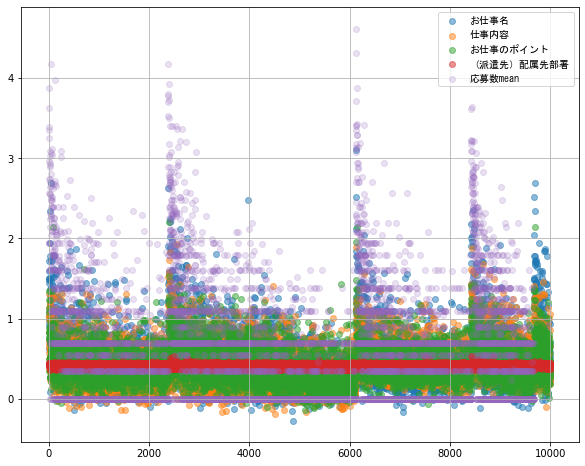

In [83]:
start = 0
end = 10000
plt.figure(figsize=(10, 8))
plt.scatter(range(start, end), all_df["お仕事名_pred"][start:end].values, alpha=0.5)
plt.scatter(range(start, end), all_df["仕事内容_pred"][start:end].values, alpha=0.5)
plt.scatter(range(start, end), all_df["お仕事のポイント_pred"][start:end].values, alpha=0.5)
plt.scatter(range(start, end), all_df["（派遣先）配属先部署_pred"][start:end].values, alpha=0.5)
plt.scatter(range(start, end), all_df["応募数mean"][start:end].values, alpha=0.2)
plt.legend(["お仕事名", "仕事内容", "お仕事のポイント", "（派遣先）配属先部署", "応募数mean"],
           prop={"family":"MS Gothic"})
plt.grid()
plt.show()

### （派遣先）職場の雰囲気

In [84]:
all_df["（派遣先）職場の雰囲気"] = all_df["（派遣先）職場の雰囲気"].fillna("NA")

In [85]:
all_df["（派遣先）職場の雰囲気"].value_counts()

アットホームな雰囲気の職場です！<BR>            724
禁煙で快適な環境を整えております！<BR>           521
同業務の方もいるので安心です！<BR>             499
禁煙なので快適な職場環境です！<BR>             434
分煙で快適な環境です！<BR>                 398
                               ... 
フォロー体制が充実しています！<BR>               1
築年数浅めの綺麗なガラス張りのオフィスビルです！<BR>      1
同業務の方もいる綺麗なオフィスでのお仕事です！<BR>       1
綺麗なビルで快適にお仕事ができますよ！<BR>           1
環境◎なので長く勤める方が多い職場です！<BR>          1
Name: （派遣先）職場の雰囲気, Length: 937, dtype: int64

In [86]:
# Janome で形態素解析
# トークン化の関数を定義
def token5(X):
    XX = X.copy()
    XX = XX["（派遣先）職場の雰囲気"]
        
    char_filters = [UnicodeNormalizeCharFilter(),
                    RegexReplaceCharFilter(r"[!$%&\'()*+,-./:;<=>?@\\^_`{|}~◆▼★②●☆■★【】『』「」、♪≪≫]", " ")
                    ]

    token_filters = [CompoundNounFilter(),
                    POSKeepFilter(['名詞']),
                    LowerCaseFilter()
                    #,ExtractAttributeFilter('surface') # これを付けるとエラーが出る
                    ]

    a = Analyzer(char_filters=char_filters,  token_filters=token_filters)

    X_token = XX.apply(lambda x: " ".join([token.surface for token in a.analyze(x)]))

    return X_token

# トークン化
all_df["（派遣先）職場の雰囲気_token"] = token5(all_df)

In [87]:
%%time
test_token5 = token5(test_x.fillna("NA"))
test_token5

Wall time: 15.9 s


0           派遣スタッフ活躍中 br
1            雰囲気 職場環境 br
2       ランチ 社員食堂完備 職場 br
3            雰囲気 職場環境 br
4            雰囲気 オフィス br
              ...       
3386        当社スタッフ就業中 br
3387    当社スタッフさん 多数活躍 br
3388         業務就業者 安心 br
3389     当社 派遣スタッフ就業中 br
3390           職場環境良好 br
Name: （派遣先）職場の雰囲気, Length: 3391, dtype: object

In [88]:
# # MeCab
# all_df["（派遣先）職場の雰囲気_token"] = all_df["（派遣先）職場の雰囲気"].apply(wakati_text)
# all_df["（派遣先）職場の雰囲気_token"]

#### 予測

In [89]:
# パイプライン

y = all_df["応募数mean"][all_df["応募数mean"].notnull()]
X = all_df['（派遣先）職場の雰囲気_token'][:len(y)]

pipe_5 = make_pipeline(CountVectorizer(),           # BoW を計算
                       TfidfTransformer(norm='l2'),  # tf-idf変換
                       Lasso(max_iter=10000, random_state=4)) # 予測

param_grid = {"lasso__alpha": [0.0001, 0.001, 0.01]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_5 = GridSearchCV(pipe_5, param_grid=param_grid, cv=kfold,
                      scoring="neg_mean_squared_error", n_jobs=-1)
grid_5.fit(X, y)

print(grid_5.best_params_)
print(np.sqrt(-grid_5.best_score_))

# pickle化
import pickle
with open("grid_5.pickle", mode="wb") as f:
    pickle.dump(grid_1, f)

{'lasso__alpha': 0.001}
0.6551679166408847


In [90]:
all_df["（派遣先）職場の雰囲気_pred"] = grid_5.predict(all_df["（派遣先）職場の雰囲気_token"])

all_df["（派遣先）職場の雰囲気_pred"]

0        0.347939
1        0.432994
2        0.424126
3        0.424126
4        0.415822
           ...   
13057    0.424126
13058    0.424126
13059    0.331051
13060    0.424126
13061    0.424126
Name: （派遣先）職場の雰囲気_pred, Length: 13062, dtype: float64

In [91]:
# tf-idfが高いまたは低い特徴量
count = grid_5.best_estimator_.named_steps["countvectorizer"]
tfid = grid_5.best_estimator_.named_steps["tfidftransformer"]

X_token = count.fit_transform(all_df["（派遣先）職場の雰囲気_token"])
X_tfid = tfid.fit_transform(X_token)

max_value = X_tfid.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(count.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:50]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-50:]]))

Features with lowest tfidf:
['br' '定着率' '大切' '敷地内' 'atm' 'エリア' 'スタート' '仲間' '社内' '快適' '合間' 'カフェ' 'コンビニ'
 '周辺' '音楽' '身近' 'センター' '活発' 'エステ利用' 'ジム' '長期' '安定就業中' 'カフェテリア' 'お昼休憩' '毎日'
 'ラクラク便利' '方々' '20' '方達' '年数' '汐留' 'イタリア街' '苦手' '最寄駅' 'ショッピングモール' '直結'
 '30代' '20代' '診療所' '安心' '清潔' '就業環境' '溜池山王' '国会議事堂前駅直結' '売店' '一望' '新宿御苑'
 '建物内' '飲食店' '経験']
Features with highest tfidf: 
['当社スタッフさん多数就業中' '自然' '指導' '有給' 'サポート' '業務者4名在籍' '業務就業者多数' '当社スタ長期就業中'
 '当社スタ多数就業中' '派遣スタ活躍中' '派遣スタ就業中' '当社スタ長期安定就業中' '派遣スタ多数' '当社スタ安定就業中'
 '当社スタッフさん安定就業中' '皆さん感じ' '職場環境' '気軽' '分煙環境' '分煙オフィス' '禁煙オフィス' '派遣スタッフ活躍中'
 '派遣スタッフ多数活躍中' '当社スタッフ就業中' '職場環境良好' '禁煙環境' '派遣スタッフ就業中' '活躍' '自社ビル勤務'
 '社員食堂' '当社スタッフさん就業中' '当社スタッフ多数活躍中' '当社スタ就業中' '当社スタッフ多数就業中' '喫煙環境'
 '当社スタッフさん多数活躍中' '大手自社ビル勤務' '社内環境バツグン' '企業' '当社スタッフ安定稼働中' 'タバコ分煙環境'
 '東京ミッドタウン日比谷内' '駅直結オフィスビル' '新規設立部門' '新築ビル' '就業環境良好' 'オフィス綺麗' 'オフィス環境良好'
 'na' '当社スタッフ活躍中']


#### LDA

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# tfidf_vec = TfidfVectorizer(max_df=.2,
#                             max_features=5000)

pipe_lda = make_pipeline(CountVectorizer(max_df=.2,
                                         max_features=5000),
                         LatentDirichletAllocation(n_components=15,
                                                   random_state=123,
                                                   learning_method="batch")
                        )
pipe_lda.fit(all_df["（派遣先）職場の雰囲気_token"])

# pickle化
import pickle
with open("lda_5.pickle", mode="wb") as f:
    pickle.dump(pipe_lda, f)

In [93]:
X_lda = pipe_lda.transform(all_df["（派遣先）職場の雰囲気_token"])
all_df["（派遣先）職場の雰囲気_lda"] = X_lda.argmax(axis=1)
all_df["（派遣先）職場の雰囲気_lda"].value_counts()

13    1806
1     1732
11    1516
7     1506
6      958
4      935
9      817
14     728
2      717
12     558
5      535
0      501
8      364
3      212
10     177
Name: （派遣先）職場の雰囲気_lda, dtype: int64

In [94]:
all_df["（派遣先）職場の雰囲気_lda"]

0         9
1        10
2         0
3         6
4        14
         ..
13057     3
13058    11
13059     4
13060    14
13061    12
Name: （派遣先）職場の雰囲気_lda, Length: 13062, dtype: int64

In [96]:
n_top_words = 5
vect = pipe_lda.named_steps['countvectorizer']
lda = pipe_lda.named_steps['latentdirichletallocation']
feature_names = vect.get_feature_names()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words - 1:-1]]))

Topic 1:
職場環境 雰囲気 アットホーム 活気 風通し
Topic 2:
禁煙 環境 職場環境 クリーン オフィス内
Topic 3:
分煙オフィス 当社スタッフ 就業中 安心 休憩室完備
Topic 4:
当社スタッフ就業中 駅直結 自社ビル勤務 安心環境 当社スタッフ在籍
Topic 5:
安心 在籍 業務就業 業務就業者 業務者
Topic 6:
オフィス 雰囲気 派遣仲間 禁煙環境 クリーン
Topic 7:
活躍中 キレイ 年齢層 方々 ビル
Topic 8:
業務 安心 休憩室 完備 就業
Topic 9:
綺麗 オフィス 就業 仕事 ビル
Topic 10:
分煙環境 当社スタッフ活躍中 きれい オフィス クリーン
Topic 11:
職場 完備 オシャレ 静か 社員食堂
Topic 12:
分煙 環境 タバコ クリーン 当社スタッフさん就業中
Topic 13:
禁煙オフィス 苦手 職場環境良好 タバコ たばこ
Topic 14:
職場 雰囲気 アットホーム 活気 和気あいあい
Topic 15:
当社 派遣スタッフ活躍中 派遣スタッフ多数活躍中 派遣スタッフ 派遣スタッフ就業中


### trainデータのトークンを保存

In [97]:
import pandas as pd
# webに乗せるためにtrainデータのトークンを保存
length = all_df["応募数mean"].notnull().sum()
pd.DataFrame({'お仕事名_token': all_df['お仕事名_token'][:length],
              '仕事内容_token': all_df['仕事内容_token'][:length],
              'お仕事のポイント_token': all_df['お仕事のポイント_token'][:length],
              '（派遣先）配属先部署_token': all_df['（派遣先）配属先部署_token'][:length],
              "（派遣先）職場の雰囲気_token":all_df["（派遣先）職場の雰囲気_token"][:length]
             }
            ).to_pickle("train_token.pickle")


In [98]:
# tokenカラムを削除
all_df = all_df.drop(columns=['お仕事名_token', '（派遣先）配属先部署_token',
                              "仕事内容_token", "お仕事のポイント_token",
                              "（派遣先）職場の雰囲気_token"])

# all_df = all_df.drop(columns=["お仕事名",  "仕事内容", "お仕事のポイント（仕事PR）", "（派遣先）配属先部署"])

## お仕事No.

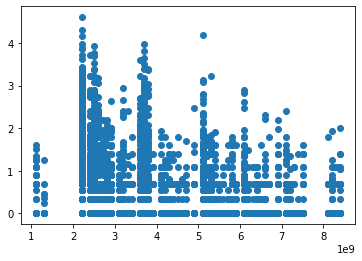

In [99]:
plt.scatter(all_df["お仕事No."], all_df["応募数mean"])

In [100]:
all_df["お仕事No."].value_counts()[all_df["お仕事No."].value_counts()>1]

2203555887    2
2203550701    2
2203545168    2
2203491918    2
2203536972    2
             ..
2203539620    2
2203488167    2
2203498858    2
2203555205    2
2203514800    2
Name: お仕事No., Length: 2087, dtype: int64

In [101]:
all_df[all_df["all_count"]>1]

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,仕事内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,応募数mean,all_count,NaN_num,NaN_（紹介予定）入社後の雇用形態,NaN_（派遣先）配属先部署 男女比 男,NaN_勤務地 最寄駅2（駅名）,NaN_（紹介予定）雇用形態備考,NaN_（派遣先）配属先部署 人数,NaN_勤務地 最寄駅1（分）,NaN_勤務地 最寄駅2（沿線名）,NaN_（派遣先）概要 勤務先名（漢字）,NaN_勤務地 最寄駅2（駅からの交通手段）,NaN_（紹介予定）入社時期,NaN_（派遣先）勤務先写真ファイル名,NaN_（派遣先）概要 事業内容,NaN_（紹介予定）年収・給与例,NaN_勤務地 最寄駅1（沿線名）,NaN_（派遣先）配属先部署 平均年齢,NaN_給与/交通費 給与上限,NaN_勤務地 最寄駅1（駅からの交通手段）,NaN_（紹介予定）休日休暇,NaN_（派遣先）職場の雰囲気,NaN_（紹介予定）待遇・福利厚生,NaN_勤務地 最寄駅1（駅名）,NaN_勤務地 最寄駅2（分）,NaN_給与/交通費 備考,NaN_期間･時間 備考,勤務開始-掲載開始,workingstart,workingend,workingtime_m,workingrest,productiontime_m,お仕事名_pred,仕事内容_pred,お仕事のポイント_pred,（派遣先）配属先部署_pred,（派遣先）職場の雰囲気_pred,（派遣先）職場の雰囲気_lda
1,3,1,0,2.0,淡路町,1,正社員,0,33.0,0,20020,1,0,1,0,0,1,1.0,2203546900,1,0,0,東京メトロ丸ノ内線,0,0,NA,1,※土・日・祝がお休みです。,3,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都千代田区,1,206東京,1,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,0,0,1,0,1018-2.jpg,1,0,経理部,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,0,東京メトロ千代田線,45.0,0,28000,13,0,0,0,2000.0,0,1,1,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある方歓迎します。<BR>【使用するＯＡ...,1,年間休日１２１日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,0,◆開始日相談可能です♪複数路線が利用でき便利！休憩室完備の自社ビル！当社スタッフさん就業中！...,0,1800,1,101,ランチに嬉しい社員食堂完備の職場です！<BR>,完備,新御茶ノ水,5.0,【月収例】26万4600円＋残業代（21日勤務の場合）,1,3.623540,5,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,1900-01-01 09:00:00,1900-01-01 17:00:00,480.0,60,420.0,1.500810,1.050894,1.340081,0.404205,0.432994,10
2,2,1,0,8.0,宝町,0,正社員,0,5.0,1,20020,0,0,0,1,0,1,6.0,2203545344,0,0,0,都営浅草線,0,0,NA,1,※土・日・祝がお休みです。,3,9:00〜17:30 <BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆6ヶ月後,【未経験でも6ヶ月後社員】賞与年4.5ヶ月分＊非営利団体で事務,0,0,1,0,NA,1,0,企画調整部,安心安定の非営利団体！落ち着いた雰囲気の職場環境です！<BR>【ＯＡ事務】<BR>会議や委員...,1,★正社員登用後：年収２７９〜３５０万円（賞与含２回／年４．５ヶ月分）★,0,東京メトロ日比谷線,42.0,0,30000,13,0,0,0,-9999.0,0,1,1,【大卒以上】◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）<BR><BR>...,1,年間休日１３７日,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,0,◆最寄駅から徒歩圏内！複数路線が利用可能！近くにコンビニ・カフェがあり便利！分煙されており快...,0,1650,1,102,落ち着いた雰囲気の職場環境です！<BR>,完備,八丁堀,6.0,【月収例】25万9875円＋残業代（21日勤務の場合）,0,3.877241,5,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,1900-01-01 09:00:00,1900-01-01 17:30:00,510.0,60,450.0,1.487396,1.130693,0.832140,0.439518,0.424126,0
4,3,NA,0,6.0,二子玉川,0,NA,0,9.0,0,22010,1,0,0,1,0,1,12.0,2203556553,1,0,0,東急田園都市線,0,0,NA,2,※土・日・祝がお休みです。※企業カレンダーあります。,3,8:30〜16:30 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,0,0,0,1,0,0,0,東京都世田谷区,1,206東京,1,0,NA,ほぼ１６時半まで！学校法人／窓口の受付など！未経験ＯＫ,0,0,1,0,NA,1,1,会計ソフト入力などを行う部署,派遣スタッフ＆幅広い年齢層の方々が活躍中！基本土日祝お休み！プライベートも充実！自転車通勤可...,1,NA,0,小田急小田原線,46.0,0,30000,13,0,0,0,1650.0,0,2,1,◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）・ＰｏｗｅｒＰｏｉｎｔ（文章...,0,NA,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,0,◆同業務就業の方が在籍で安心！オシャレを楽しめるオフィカジＯＫ♪給湯設備・ホッと一息つける休...,0,1600,1,112,派遣スタッフ活躍中です！<BR>,NA,成城学園前,15.0,【月収例】23万5200円＋残業代（21日勤務の場合）,1,2.564949,2,10,1,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,-1,1900-01-01 08:30:00,1900-01-01 16:30:00,480.0,60,420.0,0.741246,1.015649,0.498971,0.439518,0.415822,14
6,3,2,0,6.0,NA,0,契約社員,0,17.0,0,20020,0,0,1,1,0,1,1.0,2203526826,1,0,0,NA,0,0,NA,NA,※土・日・祝がお休みです。,3,8:30

In [ ]:
all_df[]

## フラグオプション

In [102]:
all_df["フラグオプション選択"].value_counts()

1    7368
0    3216
3    2335
2     139
5       4
Name: フラグオプション選択, dtype: int64

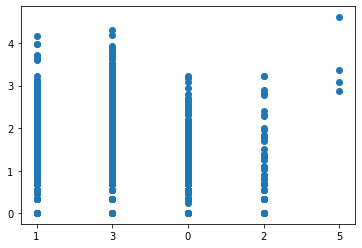

In [103]:
plt.scatter(all_df["フラグオプション選択"], all_df["応募数mean"])

In [104]:
all_df[all_df["フラグオプション選択"]=="5"]

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,お仕事名,10時以降出社OK,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署,仕事内容,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,休日休暇(金曜日),お仕事のポイント（仕事PR）,扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（派遣先）職場の雰囲気,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,応募数mean,all_count,NaN_num,NaN_（紹介予定）入社後の雇用形態,NaN_（派遣先）配属先部署 男女比 男,NaN_勤務地 最寄駅2（駅名）,NaN_（紹介予定）雇用形態備考,NaN_（派遣先）配属先部署 人数,NaN_勤務地 最寄駅1（分）,NaN_勤務地 最寄駅2（沿線名）,NaN_（派遣先）概要 勤務先名（漢字）,NaN_勤務地 最寄駅2（駅からの交通手段）,NaN_（紹介予定）入社時期,NaN_（派遣先）勤務先写真ファイル名,NaN_（派遣先）概要 事業内容,NaN_（紹介予定）年収・給与例,NaN_勤務地 最寄駅1（沿線名）,NaN_（派遣先）配属先部署 平均年齢,NaN_給与/交通費 給与上限,NaN_勤務地 最寄駅1（駅からの交通手段）,NaN_（紹介予定）休日休暇,NaN_（派遣先）職場の雰囲気,NaN_（紹介予定）待遇・福利厚生,NaN_勤務地 最寄駅1（駅名）,NaN_勤務地 最寄駅2（分）,NaN_給与/交通費 備考,NaN_期間･時間 備考,勤務開始-掲載開始,workingstart,workingend,workingtime_m,workingrest,productiontime_m,お仕事名_pred,仕事内容_pred,お仕事のポイント_pred,（派遣先）配属先部署_pred,（派遣先）職場の雰囲気_pred,（派遣先）職場の雰囲気_lda
6121,3,2,0,2.0,NA,1,契約社員,0,237.0,0,20040,1,0,0,0,0,1,7.0,2203525441,1,0,0,NA,0,0,NA,NA,※土・日・祝がお休みです。,5,9:00〜17:00 <BR>※残業は月１５時間程度と少なめです。<BR>※休憩は６０分です。,5,1,0,0,1,0,0,1,東京都新宿区,1,206東京,1,0,◆6ヶ月後,社員登用予定！賞与２回！生命保険販売事業会社での電話業務,0,0,1,0,NA,1,0,カスタマーセンターＧ,未経験でもＯＫ！綺麗なオフィスビル☆残業少なめでプライベートも充実可能です！<BR>【お仕事...,1,★契約社員登用後：年収３３３万円〜（賞与含２回／年２．５ヶ月分）★,0,東京メトロ丸ノ内線,35.0,0,28000,13,0,0,0,-9999.0,0,1,1,［高卒以上］◆生命保険業務の経験＆受発信オペレーターの経験がある方歓迎。<BR><BR>▼オ...,1,年間休日１２２日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,0,◆開始日相談可能です♪大手企業で働くチャンス！ワークライフバランス奨励で有給がとりやすい環境...,0,1900,1,104,禁煙で快適な環境です！<BR>,完備,西新宿,-9999.0,【月収例】27万9300円＋残業代（21日勤務の場合）,0,3.357692,2,8,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,-1,1900-01-01 09:00:00,1900-01-01 17:00:00,480.0,60,420.0,0.959932,0.722913,1.476685,0.439518,0.453549,1
6123,3,1,0,10.0,銀座,0,正社員,0,2.0,0,20020,0,0,1,1,0,1,5.0,2203539650,0,0,1,東京メトロ日比谷線,0,0,NA,1,※土・日・祝がお休みです。,5,9:00〜18:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,0,0,1,0,1,0,東京都中央区,1,206東京,1,0,◆3ヶ月後,3ヶ月後に正社員へ[年収362万円〜]非営利団体*こつこつ系事務,0,0,1,0,NA,1,1,システム情報管理部,［非営利団体］同業務の方もいるので安心！残業がほとんどなくプライベートも充実できますよ☆<B...,1,★正社員登用後：年収３６２〜３９０万円（賞与含２回／年２ヶ月分）★,0,東京メトロ銀座線,50.0,0,30000,13,0,0,0,1900.0,0,3,1,【学歴不問】◆事務経験＆経理会計ソフトの使用経験のある方歓迎します。<BR>【ＯＡスキル】Ｅ...,1,年間休日１２５日,0,1,0,0,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,0,◆京橋駅チカで通勤便利！たばこが苦手な方には嬉しい快適な禁煙環境！人気の紹介予定派遣のオシゴ...,0,1800,1,102,同業務の方もいるので安心です！<BR>,完備,京橋,10.0,【月収例】30万2400円＋残業代（21日勤務の場合）,1,4.615121,1,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,1900-01-01 09:00:00,1900-01-01 18:00:00,540.0,60,480.0,3.105824,1.894618,1.958169,0.441793,0.456905,7
6129,2,1,0,0.0,蔵前,0,正社員,0,3.0,0,20710,1,0,0,0,0,0,8.0,2203523737,0,0,0,都営浅草線,0,0,NA,1,※土・日・祝がお休みです。,5,9:20〜17:20 <BR>※残業は月２０時間以下と少なめです。<BR>※休憩は６０分です。,5,1,0,0,0,0,1,1,東京都台東区,1,206東京,1,0,◆2ヶ月後,★正社員前提！賞与年２回★データ入力業務！未経験ＯＫ！,0,0,1,0,NA,1,0,事務部門,《アプリ開発などを行う会社》土日祝お休み♪残業が少なめなので無理なくお仕事をしていただけます...,1,★正社員登用後：年収３１５〜３５０万円（賞与含２回／年３ヶ月）★※実際の年収等は別途ご確認く...,0,中央・総武各駅停車,45.0,0,27000,13,1,0,0,-9999.0,0,4,1,＜専門卒以上＞<BR>【第２新卒応援】◆未経験者歓迎！<BR>※タッチタイピングができる方歓...,1,年間休日１２２日,0,0,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,0,◆駅徒歩圏内！近くに飲食店・コンビニあり！分煙で快適な環境！オフィスカジュアルＯＫ！業務で分...,0,1750,1,106,分煙された快適な環境です！<BR>,完備,浅草橋,6.0,【月収例】25万7250円＋残業代（21日勤務の場合）,0,3.081657,3,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,-1,1900-01-01 09:20:00,1900-01-01 17:20:00,480.0,60,420.0,0.693785,0.742208,0.434871,0.391686,0.396635,11
6163,3,NA,0,5.0,表参道,1,NA,1,13.0,0,20020,0,0,1,0,0,1,5.0,2203527845,

## スケーリング(被説明変数)

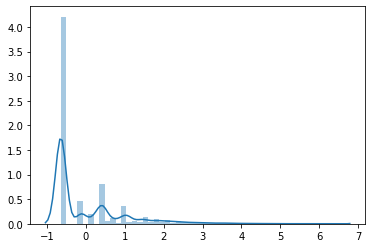

In [105]:
# スケーリング
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(all_df["応募数mean"].values.reshape(-1, 1))

sns.distplot(scaled)

## Label Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder

all_df_labeled = all_df.copy()
all_df_labeled = all_df_labeled.drop(columns=["お仕事名",  "仕事内容", "お仕事のポイント（仕事PR）",
                                              "（派遣先）配属先部署", "（派遣先）職場の雰囲気"])

# Label Encoding
cat_cols = list(all_df_labeled.dtypes[all_df_labeled.dtypes == "object"].index)
for col in cat_cols:
    le = LabelEncoder()
    all_df_labeled[col] = le.fit_transform(all_df_labeled[col].apply(lambda x: str(x)))

all_df_labeled

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,Wordのスキルを活かす,勤務地 最寄駅1（分）,お仕事No.,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,10時以降出社OK,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,休日休暇(金曜日),扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,応募数mean,all_count,NaN_num,NaN_（紹介予定）入社後の雇用形態,NaN_（派遣先）配属先部署 男女比 男,NaN_勤務地 最寄駅2（駅名）,NaN_（紹介予定）雇用形態備考,NaN_（派遣先）配属先部署 人数,NaN_勤務地 最寄駅1（分）,NaN_勤務地 最寄駅2（沿線名）,NaN_（派遣先）概要 勤務先名（漢字）,NaN_勤務地 最寄駅2（駅からの交通手段）,NaN_（紹介予定）入社時期,NaN_（派遣先）勤務先写真ファイル名,NaN_（派遣先）概要 事業内容,NaN_（紹介予定）年収・給与例,NaN_勤務地 最寄駅1（沿線名）,NaN_（派遣先）配属先部署 平均年齢,NaN_給与/交通費 給与上限,NaN_勤務地 最寄駅1（駅からの交通手段）,NaN_（紹介予定）休日休暇,NaN_（派遣先）職場の雰囲気,NaN_（紹介予定）待遇・福利厚生,NaN_勤務地 最寄駅1（駅名）,NaN_勤務地 最寄駅2（分）,NaN_給与/交通費 備考,NaN_期間･時間 備考,勤務開始-掲載開始,workingstart,workingend,workingtime_m,workingrest,productiontime_m,お仕事名_pred,仕事内容_pred,お仕事のポイント_pred,（派遣先）配属先部署_pred,（派遣先）職場の雰囲気_pred,（派遣先）職場の雰囲気_lda
0,3,3,0,6.0,0,0,0,0,12.0,0,10,1,0,1,1,0,1,3.0,2203566799,1,0,0,0,0,0,0,3,138,1,3072,5,0,0,0,1,0,0,0,452,1,11,1,1,0,0,0,1,0,32,1,0,1,0,0,188,45.0,0,12,13,0,0,0,-9999.0,0,1,0,2741,0,0,0,1,0,1,0,1,3,0,0,1550,1,20,0,325,-9999.0,185,1,1.945910,1,14,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,40,25,22,420.0,60,360.0,0.976537,0.501868,0.353042,0.410425,0.347939,9
1,3,1,0,2.0,566,1,7,0,33.0,0,0,1,0,1,0,0,1,1.0,2203546900,1,0,0,112,0,0,0,0,134,3,2078,5,1,0,0,1,0,1,0,415,1,11,1,1,4,0,0,1,0,0,1,0,1,1118,0,188,45.0,0,6,13,0,0,0,2000.0,0,0,0,4774,1,22,0,1,0,0,0,1,3,0,0,1800,1,0,65,832,5.0,423,1,3.623540,5,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,19,29,480.0,60,420.0,1.500810,1.050894,1.340081,0.404205,0.432994,10
2,2,1,0,8.0,320,0,7,0,5.0,1,0,0,0,0,1,0,1,6.0,2203545344,0,0,0,191,0,0,0,0,134,3,2274,5,1,0,0,1,0,1,0,411,1,11,1,0,7,0,0,1,0,32,1,0,1,791,0,192,42.0,0,12,13,0,0,0,-9999.0,0,0,0,4675,1,34,0,1,0,1,0,1,3,0,0,1650,1,1,65,261,6.0,410,0,3.877241,5,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,19,35,510.0,60,450.0,1.487396,1.130693,0.832140,0.439518,0.424126,0
3,3,1,0,8.0,419,1,7,0,22.0,0,7,0,0,0,0,0,1,7.0,2203569493,1,0,0,167,0,0,0,0,134,3,2497,5,1,0,0,1,0,1,0,415,1,11,1,0,7,0,0,1,0,32,1,0,1,1162,0,155,42.0,0,1,13,0,0,0,1650.0,0,3,0,4685,1,28,0,1,0,1,0,1,3,0,0,1600,1,0,65,941,10.0,402,1,1.945910,1,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,19,38,520.0,60,460.0,0.621543,1.309331,0.752270,0.410416,0.424126,6
4,3,3,0,6.0,92,0,0,0,9.0,0,10,1,0,0,1,0,1,12.0,2203556553,1,0,0,128,0,0,0,1,138,3,980,5,0,0,0,1,0,0,0,410,1,11,1,0,0,0,0,1,0,32,1,1,1,0,0,150,46.0,0,12,13,0,0,0,1650.0,0,1,0,2697,0,0,0,1,0,1,0,1,3,0,0,1600,1,11,0,773,15.0,324,1,2.564949,2,10,1,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,-1,13,22,480.0,60,420.0,0.741246,1.015649,0.498971,0.439518,0.415822,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,3,3,0,-9999.0,548,0,0,0,-9999.0,0,0,0,0,0,0,0,1,7.0,2203538197,1,0,0,95,0,0,0,0,134,0,2816,5,0,0,0,1,0,0,0,451,1,11,1,0,0,0,0,1,0,32,1,0,1,0,0,193,-9999.0,0,4,13,0,0,0,-9999.0,0,4,0,843,0,0,0,

## ダミー変数

In [107]:
# all_df_dummies = pd.get_dummies(all_df)
# all_df_dummies.shape

## 予測モデル

In [108]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

### データ分割

In [ ]:
all_df_labeled = all_df_labeled.drop(columns=["お仕事No."])
train = all_df_labeled[all_df_labeled["応募数mean"].notnull()]
test = all_df_labeled[all_df_labeled["応募数mean"].isnull()].drop(columns=["応募数mean"])

X = train.drop(columns=["応募数mean"])
y = train["応募数mean"]

In [170]:
test

,職場の様子,（紹介予定）入社後の雇用形態,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,勤務地 最寄駅2（駅名）,大手企業,（紹介予定）雇用形態備考,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,短時間勤務OK(1日4h以内),駅から徒歩5分以内,学校・公的機関（官公庁）,土日祝のみ勤務,Wordのスキルを活かす,勤務地 最寄駅1（分）,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,フラグオプション選択,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),社員食堂あり,（紹介予定）入社時期,10時以降出社OK,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,（派遣先）勤務先写真ファイル名,服装自由,PowerPointのスキルを活かす,休日休暇(土曜日),（紹介予定）年収・給与例,休日休暇(木曜日),勤務地 最寄駅1（沿線名）,（派遣先）配属先部署 平均年齢,英語力を活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,応募資格,紹介予定派遣,（紹介予定）休日休暇,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,休日休暇(金曜日),扶養控除内,給与/交通費 給与下限,オフィスが禁煙・分煙,勤務地 市区町村コード,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,給与/交通費 備考,残業なし,all_count,NaN_num,NaN_（紹介予定）入社後の雇用形態,NaN_（派遣先）配属先部署 男女比 男,NaN_勤務地 最寄駅2（駅名）,NaN_（紹介予定）雇用形態備考,NaN_（派遣先）配属先部署 人数,NaN_勤務地 最寄駅1（分）,NaN_勤務地 最寄駅2（沿線名）,NaN_（派遣先）概要 勤務先名（漢字）,NaN_勤務地 最寄駅2（駅からの交通手段）,NaN_（紹介予定）入社時期,NaN_（派遣先）勤務先写真ファイル名,NaN_（派遣先）概要 事業内容,NaN_（紹介予定）年収・給与例,NaN_勤務地 最寄駅1（沿線名）,NaN_（派遣先）配属先部署 平均年齢,NaN_給与/交通費 給与上限,NaN_勤務地 最寄駅1（駅からの交通手段）,NaN_（紹介予定）休日休暇,NaN_（派遣先）職場の雰囲気,NaN_（紹介予定）待遇・福利厚生,NaN_勤務地 最寄駅1（駅名）,NaN_勤務地 最寄駅2（分）,NaN_給与/交通費 備考,NaN_期間･時間 備考,勤務開始-掲載開始,workingstart,workingend,workingtime_m,workingrest,productiontime_m,お仕事名_pred,仕事内容_pred,お仕事のポイント_pred,（派遣先）配属先部署_pred,（派遣先）職場の雰囲気_pred,（派遣先）職場の雰囲気_lda
9671,3,3,0,6.0,92,0,0,0,9.0,0,10,1,0,0,1,0,1,12.0,1,0,0,128,0,0,0,1,138,3,980,5,0,0,0,1,0,0,0,410,1,11,1,0,0,0,0,1,0,32,1,1,1,0,0,150,46.0,0,12,13,0,0,0,1650.0,0,1,0,2697,0,0,0,1,0,1,0,1,3,0,0,1600,1,11,0,773,15.0,324,1,2,11,1,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,-1,13,22,480.0,60,420.0,0.741246,1.013633,0.498971,0.439518,0.415822,14
9672,3,1,0,5.0,537,0,7,0,11.0,0,12,1,0,1,0,0,1,4.0,1,0,0,115,0,0,0,0,134,3,2091,5,1,0,0,1,0,1,1,411,1,11,1,0,7,0,0,1,0,32,1,0,1,1171,0,192,35.0,0,6,13,0,0,0,1750.0,0,4,0,4792,1,22,0,1,0,1,0,1,3,0,0,1700,1,1,65,205,1.0,372,0,3,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,19,29,480.0,60,420.0,2.519523,0.984413,0.430694,0.439518,0.424126,0
9673,3,1,0,2.0,566,1,7,0,33.0,0,0,1,0,1,0,0,1,1.0,1,0,0,112,0,0,0,0,134,3,2078,5,1,0,0,1,0,1,0,415,1,11,1,1,4,0,0,1,0,32,1,0,1,1118,0,188,45.0,0,6,13,0,0,0,2000.0,0,0,0,4774,1,22,0,1,0,0,0,1,3,0,0,1800,1,0,65,832,5.0,423,1,5,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,19,29,480.0,60,420.0,1.500810,1.049043,1.340081,0.404205,0.432994,10
9674,2,1,0,8.0,320,0,7,0,5.0,1,0,0,0,0,1,0,1,6.0,0,0,0,191,0,0,0,0,134,3,2274,5,1,0,0,1,0,1,0,411,1,11,1,0,7,0,0,1,0,32,1,0,1,791,0,192,42.0,0,12,13,0,0,0,-9999.0,0,0,0,4675,1,34,0,1,0,1,0,1,3,0,0,1650,1,1,65,261,6.0,410,0,5,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,19,35,510.0,60,450.0,1.487396,1.128403,0.832140,0.439518,0.424126,0
9675,2,1,0,6.0,445,0,7,0,8.0,0,0,1,0,1,0,0,1,3.0,0,0,0,191,0,0,0,0,134,3,2078,5,1,0,0,1,0,1,0,411,1,11,1,0,7,0,0,1,0,32,1,1,1,1088,0,194,-9999.0,0,6,13,0,0,0,-9999.0,0,2,0,5032,1,21,0,1,0,1,0,1,3,0,0,1700,1,1,65,1400,7.0,372,1,2,5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,8,19,29,480.0,60,420.0,0.513427,0.757520,0.778314,0.410425,0.424126,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,3,3,0,-9999.0,548,0,0,0,-9999.0,0,0,0,0,0,0,0,1,7.0,1,0,0,95,0,0,0,0,134,0,2816,5,0,0,0,1,0,0,0,451,1,11,1,0,0,0,0,1,0,32,1,0,1,0,0,193,-9999.0,0,4,13,0,0,0,-9999.0,0,4,0,843,0,0,0,1,0,1,0,1,3,0,0,1550,1,15,0,974,10.0,421,1,3,16,1,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,0,1,0,0,0,1,-1,19,43,540.0,60,4

### Lasso

In [139]:
%%time
# パイプライン
pipe_la = make_pipeline(RobustScaler(), Lasso(alpha=1.0,
                                              max_iter=10000,
                                              random_state=10))

# グリットサーチ
param_grid = {"lasso__alpha": [0.01, 0.1, 0.5]}

grid_pipe_la = GridSearchCV(pipe_la, param_grid=param_grid, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
grid_pipe_la.fit(X, y)

# パラメータ、スコア
print(grid_pipe_la.best_params_)
print(np.sqrt(-(grid_pipe_la.best_score_))) # rmseを算出

{'lasso__alpha': 0.01}
0.49917665955313445
Wall time: 15.4 s


### KernelRidge

In [140]:
# %%time
# # パイプライン
# pipe_kr = make_pipeline(RobustScaler(), KernelRidge(alpha=1.0,
#                                                     kernel="polynomial",
#                                                     degree=2,
#                                                    ))
# # グリットサーチ
# param_grid = {"kernelridge__alpha": [0.1, 1]}

# grid_pipe_kr = GridSearchCV(pipe_kr, param_grid=param_grid, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
# grid_pipe_kr.fit(X, y)

# # パラメータ、スコア
# print(grid_pipe_kr.best_params_)
# print(np.sqrt(-(grid_pipe_kr.best_score_))) # rmseを算出

### ElasticNet

In [141]:
%%time
# パイプライン
pipe_enet = make_pipeline(RobustScaler(), ElasticNet(max_iter=10000,
                                                     random_state=10))

# グリットサーチ
param_grid = {"elasticnet__alpha": [0.01, 0.05, 0.1],
              "elasticnet__l1_ratio": [0.1, 0.5]}

grid_pipe_enet = GridSearchCV(pipe_enet, param_grid=param_grid, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
grid_pipe_enet.fit(X, y)

# パラメータ、スコア
print(grid_pipe_enet.best_params_)
print(np.sqrt(-(grid_pipe_enet.best_score_))) # rmseを算出

{'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.1}
0.49428816209044024
Wall time: 31.9 s


### GradientBoosting

In [142]:
gbr = GradientBoostingRegressor(n_estimators=3000,
                                learning_rate=0.05,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10, 
                                loss='huber', # 外れ値に対して堅牢な損失関数
                                random_state=5)

# rmseスコア(交差検証)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gbr, X, y, cv=kfold,
                         n_jobs=-1, scoring="neg_mean_squared_error")
print(np.sqrt(-scores)) # rmse
print(np.sqrt(-scores).mean())

[0.45348668 0.46583347 0.46691306 0.44812377 0.44423569]
0.4557185351707231


### Xgboost

In [188]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

xgb_normal = xgb.XGBRegressor(objective="reg:squarederror", # デフォルト
                              n_estimators=5000,            # 決定木の数
                              learning_rate=0.05,
                              max_depth=3,
                              colsample_bytree=1.0,
                              colsample_bylevel=0.3,
                              subsample=0.9,
                              gamma=0,
                              reg_lambda=1,
                              reg_alpha=0,
                              min_child_weight=1,
                              random_state=10,
                              n_jobs=-1
                              )

xgb_normal.fit(X_train,
               y_train, 
               eval_metric='rmse',                              # 分析中にrmseで評価
               eval_set=[(X_train, y_train), (X_test, y_test)], # 分析中に評価に使うデータ
               early_stopping_rounds=200) 


[0]	validation_0-rmse:0.65974	validation_1-rmse:0.62174
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.65225	validation_1-rmse:0.61501
[2]	validation_0-rmse:0.64175	validation_1-rmse:0.60498
[3]	validation_0-rmse:0.63307	validation_1-rmse:0.59704
[4]	validation_0-rmse:0.62567	validation_1-rmse:0.59102
[5]	validation_0-rmse:0.62212	validation_1-rmse:0.58781
[6]	validation_0-rmse:0.61236	validation_1-rmse:0.57887
[7]	validation_0-rmse:0.60576	validation_1-rmse:0.57269
[8]	validation_0-rmse:0.59822	validation_1-rmse:0.56578
[9]	validation_0-rmse:0.59127	validation_1-rmse:0.55965
[10]	validation_0-rmse:0.58435	validation_1-rmse:0.55341
[11]	validation_0-rmse:0.57840	validation_1-rmse:0.54792
[12]	validation_0-rmse:0.57276	validation_1-rmse:0.54331
[13]	validation_0-rmse:0.56667	validation_1-rmse:0.53832
[14]	validation_0-rmse:0.56236	validation_1-rmse:0.5

[141]	validation_0-rmse:0.44306	validation_1-rmse:0.45958
[142]	validation_0-rmse:0.44271	validation_1-rmse:0.45934
[143]	validation_0-rmse:0.44245	validation_1-rmse:0.45920
[144]	validation_0-rmse:0.44222	validation_1-rmse:0.45905
[145]	validation_0-rmse:0.44200	validation_1-rmse:0.45901
[146]	validation_0-rmse:0.44183	validation_1-rmse:0.45895
[147]	validation_0-rmse:0.44162	validation_1-rmse:0.45883
[148]	validation_0-rmse:0.44146	validation_1-rmse:0.45879
[149]	validation_0-rmse:0.44132	validation_1-rmse:0.45867
[150]	validation_0-rmse:0.44123	validation_1-rmse:0.45866
[151]	validation_0-rmse:0.44099	validation_1-rmse:0.45862
[152]	validation_0-rmse:0.44079	validation_1-rmse:0.45851
[153]	validation_0-rmse:0.44056	validation_1-rmse:0.45854
[154]	validation_0-rmse:0.44033	validation_1-rmse:0.45847
[155]	validation_0-rmse:0.44025	validation_1-rmse:0.45851
[156]	validation_0-rmse:0.44004	validation_1-rmse:0.45847
[157]	validation_0-rmse:0.43987	validation_1-rmse:0.45843
[158]	validati

[283]	validation_0-rmse:0.42110	validation_1-rmse:0.45471
[284]	validation_0-rmse:0.42098	validation_1-rmse:0.45468
[285]	validation_0-rmse:0.42087	validation_1-rmse:0.45462
[286]	validation_0-rmse:0.42071	validation_1-rmse:0.45464
[287]	validation_0-rmse:0.42061	validation_1-rmse:0.45461
[288]	validation_0-rmse:0.42054	validation_1-rmse:0.45461
[289]	validation_0-rmse:0.42040	validation_1-rmse:0.45460
[290]	validation_0-rmse:0.42034	validation_1-rmse:0.45463
[291]	validation_0-rmse:0.42015	validation_1-rmse:0.45472
[292]	validation_0-rmse:0.42006	validation_1-rmse:0.45464
[293]	validation_0-rmse:0.42000	validation_1-rmse:0.45465
[294]	validation_0-rmse:0.41989	validation_1-rmse:0.45469
[295]	validation_0-rmse:0.41977	validation_1-rmse:0.45469
[296]	validation_0-rmse:0.41966	validation_1-rmse:0.45470
[297]	validation_0-rmse:0.41954	validation_1-rmse:0.45474
[298]	validation_0-rmse:0.41939	validation_1-rmse:0.45471
[299]	validation_0-rmse:0.41927	validation_1-rmse:0.45465
[300]	validati

[425]	validation_0-rmse:0.40687	validation_1-rmse:0.45367
[426]	validation_0-rmse:0.40677	validation_1-rmse:0.45377
[427]	validation_0-rmse:0.40667	validation_1-rmse:0.45385
[428]	validation_0-rmse:0.40658	validation_1-rmse:0.45389
[429]	validation_0-rmse:0.40655	validation_1-rmse:0.45388
[430]	validation_0-rmse:0.40645	validation_1-rmse:0.45392
[431]	validation_0-rmse:0.40637	validation_1-rmse:0.45393
[432]	validation_0-rmse:0.40626	validation_1-rmse:0.45394
[433]	validation_0-rmse:0.40618	validation_1-rmse:0.45388
[434]	validation_0-rmse:0.40611	validation_1-rmse:0.45378
[435]	validation_0-rmse:0.40600	validation_1-rmse:0.45375
[436]	validation_0-rmse:0.40591	validation_1-rmse:0.45375
[437]	validation_0-rmse:0.40582	validation_1-rmse:0.45374
[438]	validation_0-rmse:0.40574	validation_1-rmse:0.45373
[439]	validation_0-rmse:0.40561	validation_1-rmse:0.45379
[440]	validation_0-rmse:0.40557	validation_1-rmse:0.45377
[441]	validation_0-rmse:0.40553	validation_1-rmse:0.45376
[442]	validati

[567]	validation_0-rmse:0.39372	validation_1-rmse:0.45310
[568]	validation_0-rmse:0.39370	validation_1-rmse:0.45318
[569]	validation_0-rmse:0.39358	validation_1-rmse:0.45317
[570]	validation_0-rmse:0.39349	validation_1-rmse:0.45313
[571]	validation_0-rmse:0.39347	validation_1-rmse:0.45312
[572]	validation_0-rmse:0.39332	validation_1-rmse:0.45308
[573]	validation_0-rmse:0.39319	validation_1-rmse:0.45303
[574]	validation_0-rmse:0.39309	validation_1-rmse:0.45307
[575]	validation_0-rmse:0.39304	validation_1-rmse:0.45312
[576]	validation_0-rmse:0.39296	validation_1-rmse:0.45309
[577]	validation_0-rmse:0.39286	validation_1-rmse:0.45308
[578]	validation_0-rmse:0.39282	validation_1-rmse:0.45314
[579]	validation_0-rmse:0.39270	validation_1-rmse:0.45317
[580]	validation_0-rmse:0.39259	validation_1-rmse:0.45320
[581]	validation_0-rmse:0.39245	validation_1-rmse:0.45313
[582]	validation_0-rmse:0.39234	validation_1-rmse:0.45316
[583]	validation_0-rmse:0.39225	validation_1-rmse:0.45315
[584]	validati

[709]	validation_0-rmse:0.38262	validation_1-rmse:0.45317
[710]	validation_0-rmse:0.38259	validation_1-rmse:0.45319
[711]	validation_0-rmse:0.38256	validation_1-rmse:0.45317
[712]	validation_0-rmse:0.38245	validation_1-rmse:0.45317
[713]	validation_0-rmse:0.38234	validation_1-rmse:0.45316
[714]	validation_0-rmse:0.38225	validation_1-rmse:0.45314
[715]	validation_0-rmse:0.38217	validation_1-rmse:0.45307
[716]	validation_0-rmse:0.38208	validation_1-rmse:0.45302
[717]	validation_0-rmse:0.38205	validation_1-rmse:0.45301
[718]	validation_0-rmse:0.38197	validation_1-rmse:0.45302
[719]	validation_0-rmse:0.38192	validation_1-rmse:0.45306
[720]	validation_0-rmse:0.38187	validation_1-rmse:0.45311
[721]	validation_0-rmse:0.38178	validation_1-rmse:0.45313
[722]	validation_0-rmse:0.38168	validation_1-rmse:0.45307
[723]	validation_0-rmse:0.38158	validation_1-rmse:0.45306
[724]	validation_0-rmse:0.38154	validation_1-rmse:0.45303
[725]	validation_0-rmse:0.38143	validation_1-rmse:0.45306
[726]	validati

[851]	validation_0-rmse:0.37235	validation_1-rmse:0.45343
[852]	validation_0-rmse:0.37234	validation_1-rmse:0.45345
[853]	validation_0-rmse:0.37229	validation_1-rmse:0.45343
[854]	validation_0-rmse:0.37221	validation_1-rmse:0.45345
[855]	validation_0-rmse:0.37211	validation_1-rmse:0.45344
[856]	validation_0-rmse:0.37205	validation_1-rmse:0.45342
[857]	validation_0-rmse:0.37202	validation_1-rmse:0.45343
[858]	validation_0-rmse:0.37197	validation_1-rmse:0.45343
[859]	validation_0-rmse:0.37195	validation_1-rmse:0.45342
[860]	validation_0-rmse:0.37190	validation_1-rmse:0.45338
[861]	validation_0-rmse:0.37185	validation_1-rmse:0.45339
[862]	validation_0-rmse:0.37181	validation_1-rmse:0.45334
[863]	validation_0-rmse:0.37174	validation_1-rmse:0.45329
[864]	validation_0-rmse:0.37167	validation_1-rmse:0.45332
[865]	validation_0-rmse:0.37158	validation_1-rmse:0.45336
[866]	validation_0-rmse:0.37153	validation_1-rmse:0.45332
[867]	validation_0-rmse:0.37151	validation_1-rmse:0.45332
[868]	validati

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=0.3,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=-1, num_parallel_tree=1, random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method=None, validate_parameters=False, verbosity=None)

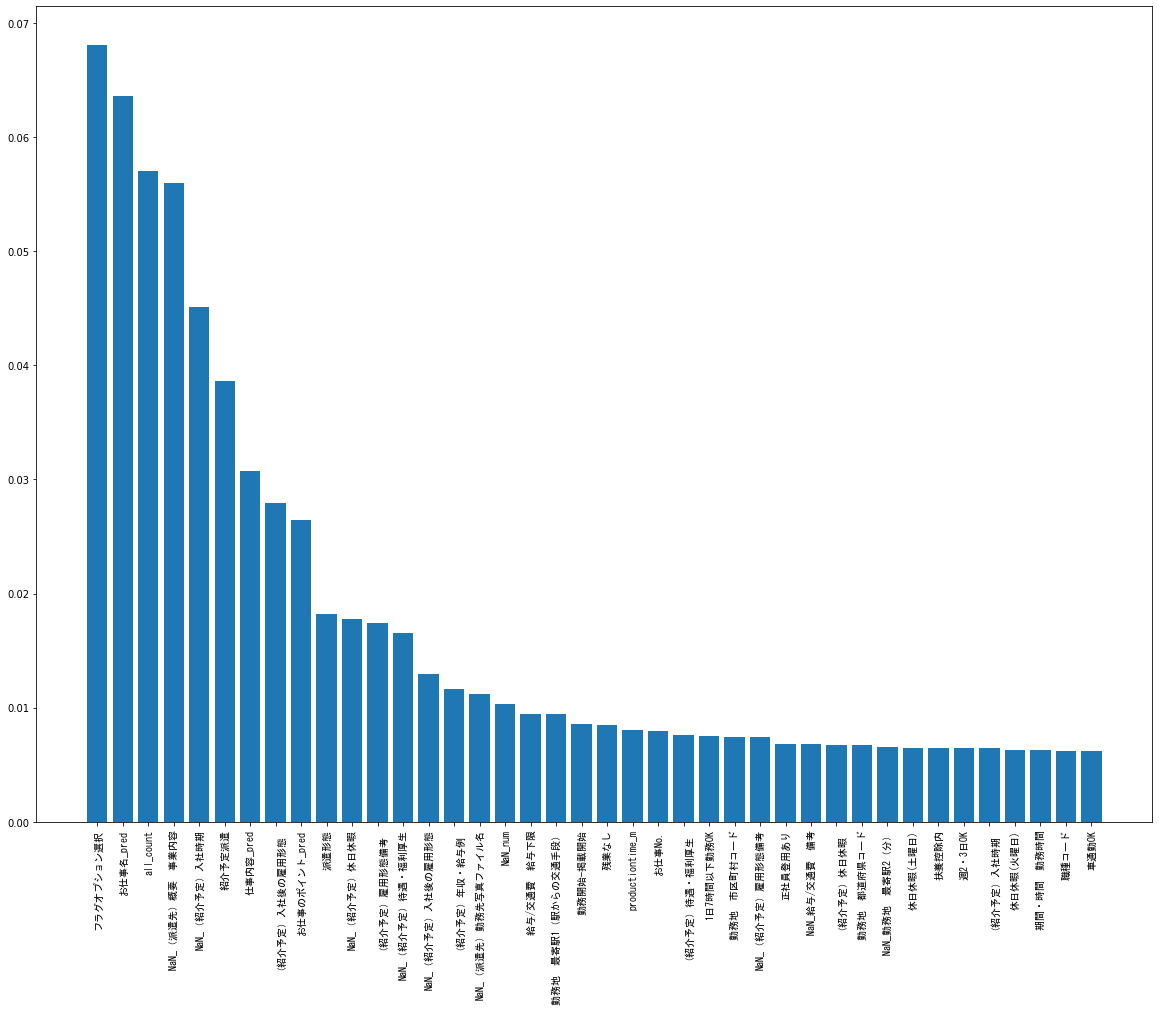

In [144]:
# 特徴量の重要度を抽出
importances = xgb_normal.feature_importances_
# 重要度の降順で元のインデックスを抽出
indices_xgb = np.argsort(importances)[::-1]

# 上位40個の重要度
indices_selected = indices_xgb[:40]
# 特徴量の重要度をプロット
plt.figure(figsize=(20,15))
plt.bar(range(indices_selected.shape[0]), importances[indices_selected])
plt.xticks(range(indices_selected.shape[0]), X.columns[indices_selected],
           rotation=90, fontname="MS Gothic")
plt.show()

In [145]:
# GBの交差検証関数(rmse)

def cv_score(model):
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=71)
    for train_id, valid_id in kfold.split(X):
        train_X, valid_X = X.iloc[train_id], X.iloc[valid_id]
        train_y, valid_y = y.iloc[train_id], y.iloc[valid_id]

        # さらにeval_setに使うデータを分割
        train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, random_state=12) 

        # 学習の実行、
        model.fit(train_X,
                  train_y, 
                  eval_metric='rmse',                             
                  eval_set=[(test_X, test_y)], 
                  early_stopping_rounds=100,
                  verbose=False
                  ) 
        # バリデーションデータの予測値の出力
        valid_pred = model.predict(valid_X)
        # スコアの計算・格納
        score = np.sqrt(mean_squared_error(valid_y, valid_pred))
        scores.append(score)

    # 各foldのスコア
    print(scores)
    print(np.mean(scores))

In [146]:
cv_score(xgb_normal)

[0.45657703128129745, 0.46466563281219025, 0.4559596905017177, 0.46790093437662544, 0.45982907369977727]
0.46098647253432157


In [147]:
0.6003345223628277
0.5121578449113129
0.513914892024984
0.511099742643091
0.5232853452132573
0.45611926554667603
0.4546153983022866
0.458756952279474

0.458756952279474

### LightGBM

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

lgb_normal = lgb.LGBMRegressor(objective="regression", 
                               n_estimators=3000,
                               learning_rate=0.05,
                               num_leaves=116, 
                               max_depth=-1,
                               subsample=0.8,
                               subsample_freq=5,
                               colsample_bytree=0.2319,
                               #feature_fraction_seed=9,
                               #bagging_seed=9,
                               min_child_samples=20,
                               min_child_weight=1,
                               reg_lambda=1,
                               reg_alpha=0,
                               random_state=10,
                               n_jobs=-1
                               )

lgb_normal.fit(X_train,
               y_train, 
               eval_metric='rmse',                              # 分析中にrmseで評価
               eval_set=[(X_train, y_train), (X_test, y_test)], # 分析中に評価に使うデータ
               early_stopping_rounds=200)

[1]	training's rmse: 0.645299	training's l2: 0.416411	valid_1's rmse: 0.652918	valid_1's l2: 0.426302
Training until validation scores don't improve for 200 rounds
[2]	training's rmse: 0.63959	training's l2: 0.409075	valid_1's rmse: 0.648911	valid_1's l2: 0.421085
[3]	training's rmse: 0.626537	training's l2: 0.392549	valid_1's rmse: 0.637998	valid_1's l2: 0.407041
[4]	training's rmse: 0.619423	training's l2: 0.383684	valid_1's rmse: 0.632654	valid_1's l2: 0.400251
[5]	training's rmse: 0.605743	training's l2: 0.366924	valid_1's rmse: 0.620886	valid_1's l2: 0.385499
[6]	training's rmse: 0.600835	training's l2: 0.361003	valid_1's rmse: 0.618021	valid_1's l2: 0.38195
[7]	training's rmse: 0.593202	training's l2: 0.351888	valid_1's rmse: 0.611996	valid_1's l2: 0.374539
[8]	training's rmse: 0.589019	training's l2: 0.346944	valid_1's rmse: 0.60989	valid_1's l2: 0.371965
[9]	training's rmse: 0.584861	training's l2: 0.342062	valid_1's rmse: 0.607874	valid_1's l2: 0.369511
[10]	training's rmse: 0

[83]	training's rmse: 0.34079	training's l2: 0.116138	valid_1's rmse: 0.482511	valid_1's l2: 0.232817
[84]	training's rmse: 0.339284	training's l2: 0.115113	valid_1's rmse: 0.482252	valid_1's l2: 0.232567
[85]	training's rmse: 0.33796	training's l2: 0.114217	valid_1's rmse: 0.482395	valid_1's l2: 0.232705
[86]	training's rmse: 0.336164	training's l2: 0.113006	valid_1's rmse: 0.481848	valid_1's l2: 0.232178
[87]	training's rmse: 0.334687	training's l2: 0.112015	valid_1's rmse: 0.48134	valid_1's l2: 0.231688
[88]	training's rmse: 0.332493	training's l2: 0.110552	valid_1's rmse: 0.480388	valid_1's l2: 0.230773
[89]	training's rmse: 0.330591	training's l2: 0.10929	valid_1's rmse: 0.479683	valid_1's l2: 0.230096
[90]	training's rmse: 0.329384	training's l2: 0.108494	valid_1's rmse: 0.479488	valid_1's l2: 0.229909
[91]	training's rmse: 0.327697	training's l2: 0.107385	valid_1's rmse: 0.478801	valid_1's l2: 0.22925
[92]	training's rmse: 0.326363	training's l2: 0.106513	valid_1's rmse: 0.47863

[167]	training's rmse: 0.241958	training's l2: 0.0585439	valid_1's rmse: 0.467054	valid_1's l2: 0.218139
[168]	training's rmse: 0.241229	training's l2: 0.0581917	valid_1's rmse: 0.466946	valid_1's l2: 0.218039
[169]	training's rmse: 0.240469	training's l2: 0.0578252	valid_1's rmse: 0.466793	valid_1's l2: 0.217896
[170]	training's rmse: 0.239377	training's l2: 0.0573016	valid_1's rmse: 0.466693	valid_1's l2: 0.217802
[171]	training's rmse: 0.238445	training's l2: 0.056856	valid_1's rmse: 0.466464	valid_1's l2: 0.217589
[172]	training's rmse: 0.237532	training's l2: 0.0564216	valid_1's rmse: 0.466311	valid_1's l2: 0.217446
[173]	training's rmse: 0.236726	training's l2: 0.0560391	valid_1's rmse: 0.46629	valid_1's l2: 0.217426
[174]	training's rmse: 0.235863	training's l2: 0.0556315	valid_1's rmse: 0.466216	valid_1's l2: 0.217357
[175]	training's rmse: 0.234917	training's l2: 0.0551859	valid_1's rmse: 0.466064	valid_1's l2: 0.217215
[176]	training's rmse: 0.233992	training's l2: 0.0547524	

[254]	training's rmse: 0.180814	training's l2: 0.0326938	valid_1's rmse: 0.462226	valid_1's l2: 0.213653
[255]	training's rmse: 0.180361	training's l2: 0.03253	valid_1's rmse: 0.462273	valid_1's l2: 0.213696
[256]	training's rmse: 0.179759	training's l2: 0.0323132	valid_1's rmse: 0.462288	valid_1's l2: 0.21371
[257]	training's rmse: 0.179204	training's l2: 0.0321139	valid_1's rmse: 0.462243	valid_1's l2: 0.213669
[258]	training's rmse: 0.178656	training's l2: 0.0319179	valid_1's rmse: 0.462212	valid_1's l2: 0.21364
[259]	training's rmse: 0.177994	training's l2: 0.031682	valid_1's rmse: 0.462272	valid_1's l2: 0.213695
[260]	training's rmse: 0.177564	training's l2: 0.0315291	valid_1's rmse: 0.462269	valid_1's l2: 0.213692
[261]	training's rmse: 0.177038	training's l2: 0.0313424	valid_1's rmse: 0.462288	valid_1's l2: 0.21371
[262]	training's rmse: 0.176679	training's l2: 0.0312154	valid_1's rmse: 0.462366	valid_1's l2: 0.213782
[263]	training's rmse: 0.176068	training's l2: 0.0310001	vali

[332]	training's rmse: 0.143284	training's l2: 0.0205304	valid_1's rmse: 0.462103	valid_1's l2: 0.213539
[333]	training's rmse: 0.142952	training's l2: 0.0204354	valid_1's rmse: 0.462154	valid_1's l2: 0.213587
[334]	training's rmse: 0.142592	training's l2: 0.0203326	valid_1's rmse: 0.46212	valid_1's l2: 0.213555
[335]	training's rmse: 0.142111	training's l2: 0.0201956	valid_1's rmse: 0.462091	valid_1's l2: 0.213528
[336]	training's rmse: 0.141586	training's l2: 0.0200466	valid_1's rmse: 0.462103	valid_1's l2: 0.213539
[337]	training's rmse: 0.14118	training's l2: 0.0199319	valid_1's rmse: 0.462128	valid_1's l2: 0.213562
[338]	training's rmse: 0.140728	training's l2: 0.0198044	valid_1's rmse: 0.462116	valid_1's l2: 0.213551
[339]	training's rmse: 0.140279	training's l2: 0.0196783	valid_1's rmse: 0.462106	valid_1's l2: 0.213542
[340]	training's rmse: 0.139779	training's l2: 0.0195382	valid_1's rmse: 0.4621	valid_1's l2: 0.213536
[341]	training's rmse: 0.139504	training's l2: 0.0194614	va

[420]	training's rmse: 0.112064	training's l2: 0.0125584	valid_1's rmse: 0.462707	valid_1's l2: 0.214098
[421]	training's rmse: 0.111729	training's l2: 0.0124835	valid_1's rmse: 0.462726	valid_1's l2: 0.214116
[422]	training's rmse: 0.111465	training's l2: 0.0124245	valid_1's rmse: 0.462728	valid_1's l2: 0.214117
[423]	training's rmse: 0.111211	training's l2: 0.0123678	valid_1's rmse: 0.462778	valid_1's l2: 0.214163
[424]	training's rmse: 0.110849	training's l2: 0.0122876	valid_1's rmse: 0.462734	valid_1's l2: 0.214122
[425]	training's rmse: 0.110584	training's l2: 0.0122289	valid_1's rmse: 0.462778	valid_1's l2: 0.214164
[426]	training's rmse: 0.110351	training's l2: 0.0121774	valid_1's rmse: 0.462803	valid_1's l2: 0.214187
[427]	training's rmse: 0.110042	training's l2: 0.0121093	valid_1's rmse: 0.462817	valid_1's l2: 0.2142
[428]	training's rmse: 0.10974	training's l2: 0.0120429	valid_1's rmse: 0.46281	valid_1's l2: 0.214193
[429]	training's rmse: 0.109363	training's l2: 0.0119603	va

[500]	training's rmse: 0.0906417	training's l2: 0.00821592	valid_1's rmse: 0.462829	valid_1's l2: 0.214211
[501]	training's rmse: 0.0903911	training's l2: 0.00817055	valid_1's rmse: 0.462829	valid_1's l2: 0.214211
[502]	training's rmse: 0.0901597	training's l2: 0.00812877	valid_1's rmse: 0.462861	valid_1's l2: 0.21424
[503]	training's rmse: 0.0899766	training's l2: 0.00809579	valid_1's rmse: 0.462868	valid_1's l2: 0.214247
[504]	training's rmse: 0.0897569	training's l2: 0.00805629	valid_1's rmse: 0.462819	valid_1's l2: 0.214202
[505]	training's rmse: 0.0895319	training's l2: 0.00801595	valid_1's rmse: 0.462821	valid_1's l2: 0.214203
[506]	training's rmse: 0.0892924	training's l2: 0.00797313	valid_1's rmse: 0.462909	valid_1's l2: 0.214284
[507]	training's rmse: 0.089033	training's l2: 0.00792687	valid_1's rmse: 0.462933	valid_1's l2: 0.214307
Early stopping, best iteration is:
[307]	training's rmse: 0.154431	training's l2: 0.0238489	valid_1's rmse: 0.46164	valid_1's l2: 0.213112


LGBMRegressor(colsample_bytree=0.2319, learning_rate=0.05, min_child_weight=1,
              n_estimators=3000, num_leaves=116, objective='regression',
              random_state=10, reg_alpha=0, reg_lambda=1, subsample=0.8,
              subsample_freq=5)

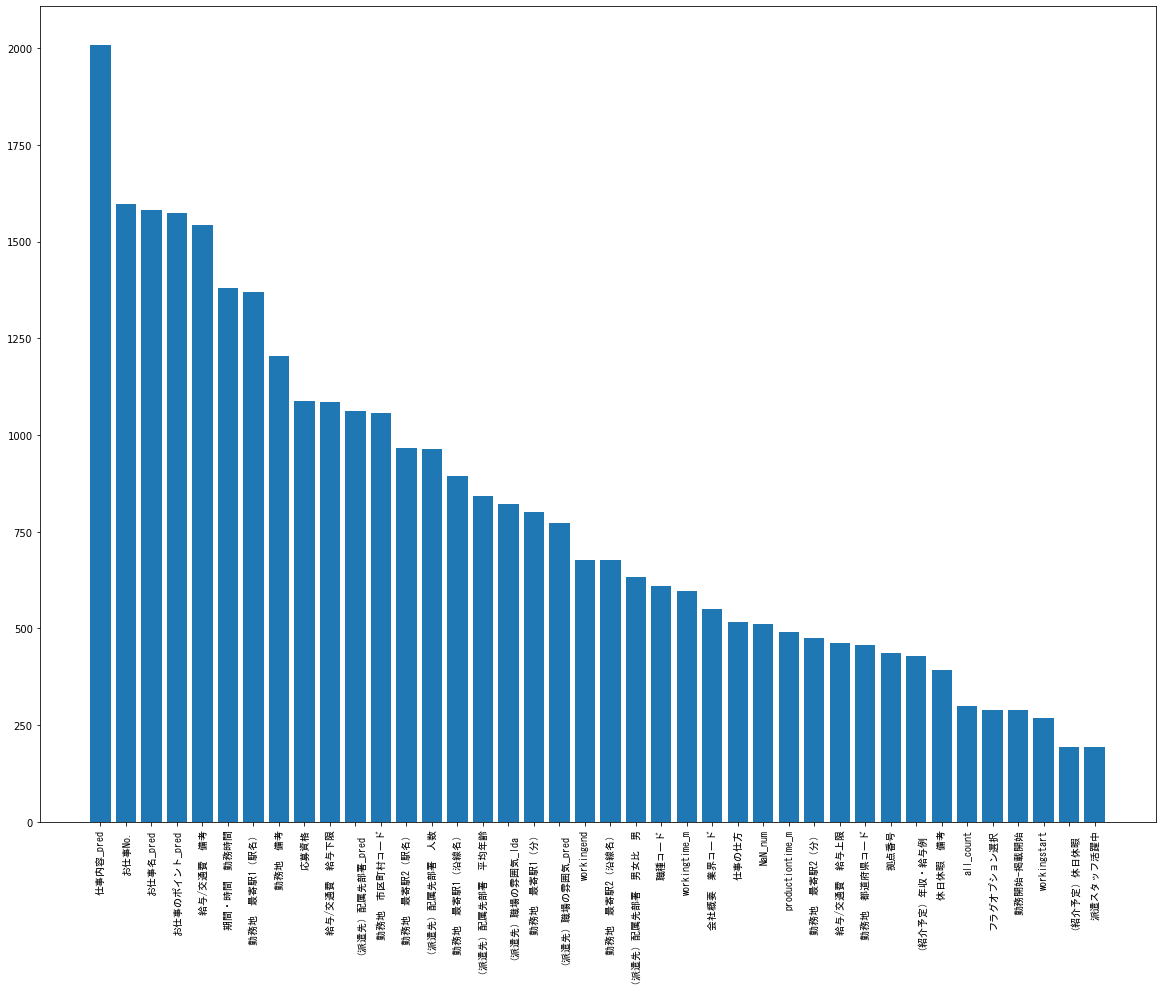

In [149]:
# 特徴量の重要度を抽出
importances = lgb_normal.feature_importances_
# 重要度の降順で元のインデックスを抽出
indices_xgb = np.argsort(importances)[::-1]

# 上位40個の重要度
indices_selected = indices_xgb[:40]
# 特徴量の重要度をプロット
plt.figure(figsize=(20,15))
plt.bar(range(indices_selected.shape[0]), importances[indices_selected])
plt.xticks(range(indices_selected.shape[0]), X.columns[indices_selected],
           rotation=90, fontname="MS Gothic")
plt.show()

In [150]:
%%time
cv_score(lgb_normal)

[0.47061536566125345, 0.46864459453290164, 0.46348088201424437, 0.472443739569075, 0.4648781209919296]
0.4680125405538808
Wall time: 33.8 s


In [123]:
0.4946983584136084
0.5061034461994419
0.5046027857087674
0.46197584178144463
0.4694868147714093
0.4717546416305104

0.4717546416305104

## 平均ベースモデル

In [132]:
from sklearn.ensemble import VotingRegressor

In [133]:
# グリットサーチから分類器を取り出す
best_pipe_la = grid_pipe_la.best_estimator_
#best_pipe_kr = grid_pipe_kr.best_estimator_
best_pipe_enet = grid_pipe_enet.best_estimator_
#best_pipe_rf = grid_pipe_rf.best_estimator_
#best_pipe_ada = grid_pipe_ada.best_estimator_

In [134]:
# 平均ベースモデル
averaged_model = VotingRegressor(estimators=[("la", best_pipe_la),
                                             #("kr", best_pipe_kr),
                                             ("enet", best_pipe_enet),
                                             #("rf", best_pipe_rf),
                                             #("ada", best_pipe_ada),
                                             #("gbr", gbr),
                                             ("xgb", xgb_normal),
                                             ("lgb", lgb_normal)
                                            ],
                                 weights=None)

In [135]:
%%time
# rmseスコア(交差検証)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(averaged_model, X, y, cv=kfold,
                         n_jobs=1, scoring="neg_mean_squared_error")
print(np.sqrt(-scores))
print(np.sqrt(-scores).mean())

[0.45576841 0.46756726 0.47088511 0.45245336 0.4532427 ]
0.4599833678862236
Wall time: 7min 48s


In [136]:
averaged_model.fit(X, y)

VotingRegressor(estimators=[('la',
                             Pipeline(steps=[('robustscaler', RobustScaler()),
                                             ('lasso',
                                              Lasso(alpha=0.01, max_iter=10000,
                                                    random_state=10))])),
                            ('enet',
                             Pipeline(steps=[('robustscaler', RobustScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.01,
                                                         l1_ratio=0.1,
                                                         max_iter=10000,
                                                         random_state=10))])),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster=None,
                                          colsample_bylevel...
                                      

## スタッキング

In [190]:
from sklearn.ensemble import StackingRegressor

In [191]:
# グリットサーチから分類器を取り出す
best_pipe_la = grid_pipe_la.best_estimator_
#best_pipe_kr = grid_pipe_kr.best_estimator_
best_pipe_enet = grid_pipe_enet.best_estimator_
#best_pipe_rf = grid_pipe_rf.best_estimator_
#best_pipe_ada = grid_pipe_ada.best_estimator_

In [192]:
# スタッキングモデル
stacked_model = StackingRegressor(estimators=[("la", best_pipe_la),  # ベース学習器
                                              #("kr", best_pipe_kr),
                                              ("enet", best_pipe_enet),
                                              #("rf", best_pipe_rf),
                                              #("ada", best_pipe_ada),
                                              ("gbr", gbr),
                                              ("xgb", xgb_normal),
                                              ("lgb", lgb_normal)                
                                             ],
                                  final_estimator=KernelRidge(alpha=1.0, # メタ学習器
                                                              ) ,
                                  passthrough=True # メタ学習器の学習にベース学習器の予測値とトレーニングデータの両方を使う
                                 )

In [130]:
%%time
# rmseスコア(交差検証)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(stacked_model, X, y, cv=kfold,
                         n_jobs=-1, scoring="neg_mean_squared_error")
print(np.sqrt(-scores))
print(np.sqrt(-scores).mean())

[0.46250816 0.47352157 0.48218023 0.46563827 0.45988249]
0.4687461437186924
Wall time: 1h 4min 48s


In [193]:
stacked_model.fit(X, y)

StackingRegressor(estimators=[('la',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('lasso',
                                                Lasso(alpha=0.01,
                                                      max_iter=10000,
                                                      random_state=10))])),
                              ('enet',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('elasticnet',
                                                ElasticNet(alpha=0.01,
                                                           l1_ratio=0.1,
                                                           max_iter=10000,
                                                           random_state=10))])),
                              ('gbr',
                               GradientBoostingRegressor(learning_rate=0.05,
                

## pickle

In [151]:
with open("stacked_model.pickle", mode="wb") as f:
    pickle.dump(stacked_model, f)

## 予測値を学習データにある値に変換

In [175]:
def getNearestValue(list, num):
    # リスト要素と対象値の差分を計算し最小値のインデックスを取得
    idx = np.abs(np.asarray(list) - num).argmin()
    return list[idx]

In [176]:
pred = stacked_model.predict(test)

values = list(train_y["応募数 合計"].unique())
pred = np.array([getNearestValue(values, a) for a in pred])

## リーク
value_counts=3のやつはtrainデータとtestデータに同じお仕事No.が必ずある

value_counts=2のやつも同じお仕事No.があるかも

In [152]:
# テストデータの"応募数mean"の"お仕事No."ごとの平均値を予測値とする
leak_df = all_df_labeled.copy() 
# np.nanmean: 欠損値を省いて計算できる
leak_df['応募数 合計'] = leak_df.groupby(["お仕事No."])["応募数mean"].transform(np.nanmean)

In [153]:
test_df = leak_df.iloc[len(train):, :]

leaked_test = test_df[test_df["応募数 合計"].notnull()].drop(columns=["お仕事No.","応募数mean"])
noleaked_test = test_df[test_df["応募数 合計"].isnull()].drop(columns=["お仕事No.","応募数mean","応募数 合計"])

leaked_test.shape

(2087, 124)

In [157]:
noleaked_test2 = noleaked_test.copy()
noleaked_test2["応募数 合計"] = stacked_model.predict(noleaked_test)

In [158]:
noleaked_test2["応募数 合計"] 

9680     0.990830
9687     0.555884
9700     0.492391
9701     0.587138
9706     1.241120
           ...   
13056   -0.095513
13058   -0.162086
13059    0.278448
13060    0.043644
13061   -0.203840
Name: 応募数 合計, Length: 1304, dtype: float64

In [159]:
leak_df = pd.concat([leaked_test, noleaked_test2], sort=True)

leak_df[["応募数 合計"]]

,応募数 合計
9671,2.564949
9672,4.306978
9673,3.623540
9674,3.877241
9675,0.693147
...,...
13056,-0.095513
13058,-0.162086
13059,0.278448
13060,0.043644


In [195]:
# リークと予測値をアンサンブル
pred_le = leak_df["応募数 合計"].values*0.25 + stacked_model.predict(test)*0.75
# 近い値に変換
values = list(train_y["応募数 合計"].unique())
pred_le = np.array([getNearestValue(values, a) for a in pred_le])

submission_leaked = pd.DataFrame({"お仕事No.": test_x["お仕事No."].values, "応募数 合計": pred_le})

In [196]:
submission_leaked

,お仕事No.,応募数 合計
0,2203556553,1.791759
1,2203515280,3.295837
2,2203546900,2.944439
3,2203545344,2.890372
4,2203557987,0.693147
...,...,...
3386,2203538197,0.000000
3387,2203544067,0.000000
3388,2203557301,0.000000
3389,2203506336,0.000000


In [197]:
# csv出力
submission_leaked.to_csv("submission.csv", index=False, encoding='utf_8_sig')

In [184]:
# 予測とリークの比較
pd.set_option('display.max_rows', 3000)
pd.DataFrame({"pred": pred,
              "leaked": pred_le
             })

,pred,leaked
0,1.609438,1.791759
1,2.995732,3.178054
2,2.708050,2.772589
3,2.564949,2.772589
4,0.693147,0.693147
...,...,...
3386,0.000000,0.000000
3387,0.000000,0.000000
3388,0.000000,0.000000
3389,0.000000,0.000000


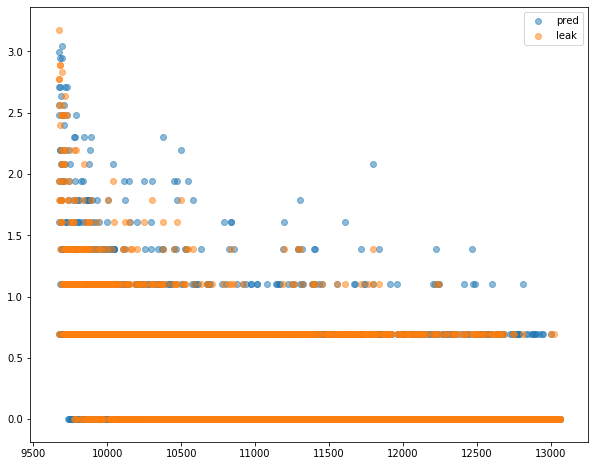

In [186]:
plt.figure(figsize=(10, 8))
plt.scatter(test.index, pred, alpha=0.5)
plt.scatter(test.index, pred_le, alpha=0.5)
plt.legend(["pred", "leak"])